<a href="https://colab.research.google.com/github/angel870326/Monthly-Revenue-Forecasting/blob/main/010_rf_xgb_comms_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2023.04.08 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

# **Monthly Revenue Forecasting with Random Forest Regressor & XGB Regressor - Results for Communications Industry**

### Contents

##### 1. Input Data
##### 5. Model Training
*  預先訓練多個模型並儲存

##### 7. Predicting Results & Feature Importance
*  Output Functions
*  Random Forest
*  XGB (hyperparameters tuned by 5-fold cross validation)
*  Scores (RMSE, MAPE, MAE, MAE%)

##### 8. Plots
*  Expected v.s. Predicted
*  Scores: RMSE, MAPE, MAE, MAE%
*  Feature Importance

##### 9. Best and Worst Model
*  各模型組合中，預測最好和最差的月份
*  Random Forest 和 XGB 各自預測最好和最差的模型組合 (with Feature Importance)
*  所有模型組合中，預測最好和最差的模型組合 (with Feature Importance)


## **0. Setup**

In [1]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
!pip install import_ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.0 MB/s eta 0:00:00


In [4]:
import import_ipynb
%cd '/content/gdrive/Shareddrives/Me/論文/code/Function'

/content/gdrive/MyDrive/論文/code/Function


In [5]:
from MonRevForecast import predictMonthlyRevenue, BestWorstModel, trainMonthlyRevenue

importing Jupyter notebook from MonRevForecast.ipynb


In [6]:
from MonRevPlot import plotExpectedPredictedRevenues, plotModelExpectedPredictedRevenues

importing Jupyter notebook from MonRevPlot.ipynb


In [7]:
from MonRevPlot import plotAllScores, compareModelScore, scoreBoxplotV

In [8]:
from MonRevPlot import plotFeatureImportance, BestWorstModelFeatureImportancePlot

### **Project Path**

In [9]:
project_path = '/content/gdrive/Shareddrives/Me/論文'

## **1. Input Data**

【**通信網路業-月營收盈餘**】

資料期間：2002年1月至2022年12月（共252個月）

資料範圍：上市、櫃公司（排除DR和KY公司）

資料來源：TEJ Company DB、公開資訊觀測站


In [10]:
org_data = pd.read_excel(os.path.join(project_path, '資料集/007_v1/200201-202212上市櫃公司月營收_通信網路業.xlsx'), index_col=0)
org_data.columns = pd.to_datetime(org_data.columns, format="%Y-%m-%d").to_period('M')
org_data

2002-01   2002-02   2002-03   2002-04   2002-05   2002-06  \
公司                                                                      
2314 台揚      200185    219179    320565    316991    278873    289556   
2321 東訊      601938    500766    652376    605152    732126    752440   
2332 友訊     1593241   1101455   1340046   1178485   1301377   1149293   
2345 智邦     1404236   1410164   1468723   1450569   1315885   1151603   
2412 中華電   14684335  14773959  13017734  14767374  14227480  14794304   
2419 仲琦      174049    153933    236625    103103    211497    288336   
2439 美律       63506     54579     72553     55635     48128     66725   
2444 兆勁      301506    217104    351221    300591    395498    349296   
2450 神腦      847340    926119   1100852    984768   1092556    835336   
2455 全新       22635     13386     20133     20308     33841     46837   
2485 兆赫      193710    180142    191895    187101    146115    150696   
2498 宏達電    1122328   1313680   1744832   1459385   1509418   2154531   
3025 星通       14304     12236     34786     20242     32496     41000   
3045 台灣大    4073013   3604401   4112197   3961304   4006650   3862742   
3047 訊舟      147263    121217    173880    157839    150147    110295   
3062 建漢      296985    389195    495686    380637    297568    534653   
3095 及成       78017     55409     97094     92836    101681     78593   
3138 耀登       24671     24274     40049     44952     38382     24211   
3221 台嘉碩      18979     26628     34218     43587     30620     22680   
3234 光環       10024     15441     20235     25301     29162     19125   
3306 鼎天       21840     14081     18326     22478     23909     23533   
4903 聯光通      78429     46679     34513     34625    127690     84966   
4904 遠傳     2645575   2750599   2816470   2838612   2979100   2819008   
4905 台聯電     109865     87597     54915     55557     58686     42493   
4906 正文      226899    249071    391165    303812    315934    322246   
4908 前鼎       19690     18538     11691     11590     15932     17812   
4909 新復興      48832     34879     46039     33270     34112     33200   
5348 系通        3232      5825      4631      3710      6117      5695   
5353 台林       69285    118139     81813    116839    161146    106053   
5388 中磊       70839     75531     95729    102432    116884    124611   
6109 亞元       51478     27863     45025     45014     29643     23489   
6136 富爾特     396671    331113    377974    397814    455717    429618   
6142 友勁      321999    253190    352043    301572    300045    279267   
6143 振曜      142881    164608    186552     99525     88623     84905   
6152 百一       91187     55279    101896     67412     71261     81076   
6163 華電網      20003    634060     42033     32374     72974     89944   
6170 統振      239883    197765    228675    226316    240046    223586   
6190 萬泰科      53422     36802     71297     64641     66122     53990   
6216 居易       45282     41851     81251     50492     40154     29019   
6241 易通展     103895    122133    104759     76701    116950     86586   
6245 立端       39292     24447     34797     55828     53290     46649   
6263 普萊德      55510     62121     76025     60640     81322     62470   
6285 啟碁      390610    293630    402474    604185    629783    320734   
8011 台通       58365     40256     57404     56928    202404     41551   
8034 榮群       16083      5271     40405     10464     31183      7075   
8048 德勝       20105     19347     32721     28763     31509     20799   
8059 凱碩      121749    152470     88308     76584     58588     72152   
8089 康全電訊     48166     79041    134351     67962    114652    387377   
8097 常珵       38048     29579     48192     66893     51522     39738   
8101 華冠      265104    352380    627471    474263    506589    442484   
8176 智捷       66978     63997     84509     98185    109806     96083   

            2002-07   2002-08   2002-09   2002-10  ...   2022-03   2022-04  \
公司                                                 ...          

In [11]:
print("Data shape:", org_data.shape)
print("Data size:", org_data.size)

Data shape: (51, 252)
Data size: 12852


## **5. Model Training**

### **5.3 預先訓練多個模型並儲存**

Random Forest: n_estimators = 100

XGB Grid Search: Hyperparameters tuned by 5-fold cross validation.


In [ ]:
# model_save_path_rf = os.path.join(project_path, 'model/comms/rf')
# model_save_path_xgb = os.path.join(project_path, 'model/comms/xgb')

In [ ]:
# start_y_1 = 2007
# end_y_1 = 2014
# start_y_2 = 2015
# end_y_2 = 2022
# start_m_1 = 1 
# end_m_1 = 12

#### **Random Forest**

In [ ]:
# 2007-2022 (23 min.)
# trainMonthlyRevenue(org_data, start_y_1, start_m_1, end_y_2, end_m_1, 'rf', save_path = model_save_path_rf)

2007-01 model saved. Using time: 8.077  secs.
2007-02 model saved. Using time: 6.442  secs.
2007-03 model saved. Using time: 8.028  secs.
2007-04 model saved. Using time: 6.303  secs.
2007-05 model saved. Using time: 7.966  secs.
2007-06 model saved. Using time: 6.313  secs.
2007-07 model saved. Using time: 8.469  secs.
2007-08 model saved. Using time: 6.511  secs.
2007-09 model saved. Using time: 7.662  secs.
2007-10 model saved. Using time: 6.573  secs.
2007-11 model saved. Using time: 7.519  secs.
2007-12 model saved. Using time: 6.647  secs.
2008-01 model saved. Using time: 7.645  secs.
2008-02 model saved. Using time: 6.580  secs.
2008-03 model saved. Using time: 7.616  secs.
2008-04 model saved. Using time: 6.709  secs.
2008-05 model saved. Using time: 7.380  secs.
2008-06 model saved. Using time: 6.511  secs.
2008-07 model saved. Using time: 7.669  secs.
2008-08 model saved. Using time: 6.477  secs.
2008-09 model saved. Using time: 7.763  secs.
2008-10 model saved. Using time: 6

#### **XGB**

In [ ]:
# 2007-2014 (1.2 hr. with GPU)
# trainMonthlyRevenue(org_data, start_y_1, start_m_1, end_y_1, end_m_1, 'xgb', save_path = model_save_path_xgb)

2007-01 model saved. Using time: 51.372  secs.
2007-02 model saved. Using time: 42.603  secs.
2007-03 model saved. Using time: 43.492  secs.
2007-04 model saved. Using time: 43.021  secs.
2007-05 model saved. Using time: 43.881  secs.
2007-06 model saved. Using time: 43.425  secs.
2007-07 model saved. Using time: 43.961  secs.
2007-08 model saved. Using time: 44.175  secs.
2007-09 model saved. Using time: 44.186  secs.
2007-10 model saved. Using time: 43.731  secs.
2007-11 model saved. Using time: 43.667  secs.
2007-12 model saved. Using time: 43.553  secs.
2008-01 model saved. Using time: 43.149  secs.
2008-02 model saved. Using time: 43.482  secs.
2008-03 model saved. Using time: 43.738  secs.
2008-04 model saved. Using time: 43.773  secs.
2008-05 model saved. Using time: 44.485  secs.
2008-06 model saved. Using time: 43.707  secs.
2008-07 model saved. Using time: 43.842  secs.
2008-08 model saved. Using time: 43.834  secs.
2008-09 model saved. Using time: 43.570  secs.
2008-10 model

In [ ]:
# 2015-2022 (1.2 hr. with GPU)
# trainMonthlyRevenue(org_data, start_y_2, start_m_1, end_y_2, end_m_1, 'xgb', save_path = model_save_path_xgb)

2015-01 model saved. Using time: 42.686  secs.
2015-02 model saved. Using time: 42.730  secs.
2015-03 model saved. Using time: 43.527  secs.
2015-04 model saved. Using time: 42.964  secs.
2015-05 model saved. Using time: 43.222  secs.
2015-06 model saved. Using time: 42.743  secs.
2015-07 model saved. Using time: 41.969  secs.
2015-08 model saved. Using time: 42.039  secs.
2015-09 model saved. Using time: 41.934  secs.
2015-10 model saved. Using time: 43.427  secs.
2015-11 model saved. Using time: 42.630  secs.
2015-12 model saved. Using time: 42.735  secs.
2016-01 model saved. Using time: 42.575  secs.
2016-02 model saved. Using time: 42.052  secs.
2016-03 model saved. Using time: 42.805  secs.
2016-04 model saved. Using time: 42.681  secs.
2016-05 model saved. Using time: 42.374  secs.
2016-06 model saved. Using time: 42.654  secs.
2016-07 model saved. Using time: 42.593  secs.
2016-08 model saved. Using time: 42.360  secs.
2016-09 model saved. Using time: 42.350  secs.
2016-10 model

## **7. Predicting Results & Feature Importance**


||訓練資料X|訓練資料y|測試資料X|測試資料y|
|---|---|---|---|---|
|Start|2002-01 - 2005-12|2006-01|2003-01 - 2006-12|2007-01|
|End|2017-12 - 2021-11|2021-12|2018-12 - 2022-11|2022-12|


In [12]:
# 預測年月
start_y = 2007
start_m = 1
end_y = 2022
end_m = 12

### **7.1 Output Functions**

In [13]:
# Output data path
output_data_path = '/content/gdrive/Shareddrives/Me/論文/Results'

In [14]:
# Output
def outputPredictingResults(category: str, modelName: str, pred: dict):
    pred['org']['org'].to_excel(os.path.join(output_data_path, f'{category}/org_pred_{modelName}_{category}.xlsx'))
    pred['org']['dec'].to_excel(os.path.join(output_data_path, f'{category}/dec_pred_{modelName}_{category}.xlsx'))
    pred['org']['season'].to_excel(os.path.join(output_data_path, f'{category}/season_pred_{modelName}_{category}.xlsx'))
    pred['def']['org'].to_excel(os.path.join(output_data_path, f'{category}/def_pred_{modelName}_{category}.xlsx'))
    pred['def']['dec'].to_excel(os.path.join(output_data_path, f'{category}/dec_def_pred_{modelName}_{category}.xlsx'))
    pred['def']['season'].to_excel(os.path.join(output_data_path, f'{category}/season_def_pred_{modelName}_{category}.xlsx'))

def outputFeatureImportance(category: str, modelName: str, feature_importance: dict):
    feature_importance['org']['org'].to_excel(os.path.join(output_data_path, f'{category}/org_feature_{modelName}_{category}.xlsx'))
    feature_importance['org']['dec'].to_excel(os.path.join(output_data_path, f'{category}/dec_feature_{modelName}_{category}.xlsx'))
    feature_importance['org']['season'].to_excel(os.path.join(output_data_path, f'{category}/season_feature_{modelName}_{category}.xlsx'))
    feature_importance['def']['org'].to_excel(os.path.join(output_data_path, f'{category}/def_feature_{modelName}_{category}.xlsx'))
    feature_importance['def']['dec'].to_excel(os.path.join(output_data_path, f'{category}/dec_def_feature_{modelName}_{category}.xlsx'))
    feature_importance['def']['season'].to_excel(os.path.join(output_data_path, f'{category}/season_def_feature_{modelName}_{category}.xlsx'))

def outputScores(category: str, modelName: str, scoresD: pd.DataFrame):
    scoresD.to_excel(os.path.join(output_data_path, f'{category}/scores_{modelName}_{category}.xlsx'))

### **7.2 Random Forest**

n_estimators = 100

In [15]:
# Load trained models
model_save_path_rf = os.path.join(project_path, 'model/comms/rf')

In [16]:
# Random Forest (5 min.)
pred_rf, feature_importance_rf, scores_rf = predictMonthlyRevenue(org_data, start_y, start_m, end_y, end_m, 'rf', search = True, save_path = model_save_path_rf)

Using time: 299.690  secs.


In [17]:
# Output
outputPredictingResults('Comms', 'rf', pred_rf)
outputFeatureImportance('Comms', 'rf', feature_importance_rf)
outputScores('Comms', 'rf', scores_rf)

#### **7.2.1 Predicting Results**

In [18]:
# Original
print(pred_rf['org']['org'].shape)
print(pred_rf['org']['dec'].shape)
print(pred_rf['org']['season'].shape)
pred_rf['org']['org'].head(4)

(51, 192)
(51, 192)
(51, 192)


2007-01    2007-02    2007-03    2007-04    2007-05    2007-06  \
2314 台揚   485954.0   418979.0   470265.0   559480.0   563362.0   579816.0   
2321 東訊  1044719.0   934464.0  1148472.0   983515.0  1093673.0  1161701.0   
2332 友訊  4305048.0  4033257.0  4960779.0  4434262.0  4295638.0  3981448.0   
2345 智邦  1823479.0  1541602.0  2412243.0  1696623.0  1929536.0  2009162.0   

           2007-07    2007-08    2007-09    2007-10  ...    2022-03  \
2314 台揚   595329.0   649325.0   597865.0   683804.0  ...   328337.0   
2321 東訊   911295.0   998796.0  1011238.0   948837.0  ...   106615.0   
2332 友訊  3741765.0  4424163.0  3868608.0  4106706.0  ...  1353246.0   
2345 智邦  1735359.0  1841130.0  1961789.0  1609698.0  ...  4749497.0   

           2022-04    2022-05    2022-06    2022-07    2022-08    2022-09  \
2314 台揚   334023.0   277810.0   355026.0   297354.0   318940.0   406453.0   
2321 東訊   104561.0   116329.0    94208.0   112767.0    97333.0    93417.0   
2332 友訊  1205550.0  1036696.0  1149185.0  1184016.0  1315499.0  1417946.0   
2345 智邦  4451017.0  4681844.0  4509921.0  4921673.0  5316337.0  5361675.0   

           2022-10    2022-11    2022-12  
2314 台揚   354375.0   380051.0   486723.0  
2321 東訊    94137.0    93229.0    89174.0  
2332 友訊  1287533.0  1299535.0  1408328.0  
2345 智邦  5341725.0  5982503.0  6554569.0  

[4 rows x 192 columns]

In [19]:
# Deflating
print(pred_rf['def']['org'].shape)
print(pred_rf['def']['dec'].shape)
print(pred_rf['def']['season'].shape)
pred_rf['def']['org'].head(4)

(51, 192)
(51, 192)
(51, 192)


2007-01    2007-02    2007-03    2007-04    2007-05    2007-06  \
2314 台揚   464980.0   444743.0   530064.0   525644.0   509986.0   564056.0   
2321 東訊   900408.0   823188.0   933996.0   905963.0   812429.0   863296.0   
2332 友訊  3601907.0  3338322.0  4100911.0  3752863.0  3109663.0  3310040.0   
2345 智邦  1306504.0  1321886.0  1346660.0  1344065.0  1243694.0  1325285.0   

           2007-07    2007-08    2007-09    2007-10  ...    2022-03  \
2314 台揚   577227.0   644585.0   627790.0   664157.0  ...   319811.0   
2321 東訊   804954.0   763444.0   753862.0   776302.0  ...    92959.0   
2332 友訊  2945696.0  3128802.0  3127874.0  3122498.0  ...  1363897.0   
2345 智邦  1163511.0  1309074.0  1222671.0  1170647.0  ...  5096341.0   

           2022-04    2022-05    2022-06    2022-07    2022-08    2022-09  \
2314 台揚   325156.0   293281.0   301107.0   357580.0   342935.0   441879.0   
2321 東訊    90506.0    80173.0    81967.0    85935.0    86913.0   105304.0   
2332 友訊  1281396.0  1336619.0  1366973.0  1429760.0  1422123.0  1428547.0   
2345 智邦  6155359.0  5913489.0  5584398.0  6269913.0  6794449.0  6542044.0   

           2022-10    2022-11    2022-12  
2314 台揚   473721.0   523869.0   523463.0  
2321 東訊    90366.0    78638.0    98264.0  
2332 友訊  1558663.0  1613524.0  1644519.0  
2345 智邦  6046926.0  7309235.0  7421128.0  

[4 rows x 192 columns]

#### **7.2.2 Feature Importance**

In [20]:
print(feature_importance_rf['org']['org'].shape)
print(feature_importance_rf['org']['dec'].shape)
print(feature_importance_rf['org']['season'].shape)
feature_importance_rf['org']['org'].head(4)

(48, 192)
(144, 192)
(48, 192)


2007-01  2007-02  2007-03  2007-04  2007-05  2007-06  2007-07  2007-08  \
t-48   0.0102   0.0109   0.0174   0.0189   0.0176   0.0186   0.0191   0.0292   
t-47   0.0169   0.0146   0.0126   0.0043   0.0135   0.0102   0.0139   0.0143   
t-46   0.0286   0.0184   0.0180   0.0251   0.0180   0.0088   0.0166   0.0327   
t-45   0.0047   0.0037   0.0017   0.0029   0.0026   0.0031   0.0031   0.0026   

      2007-09  2007-10  ...  2022-03  2022-04  2022-05  2022-06  2022-07  \
t-48   0.0286   0.0198  ...   0.0169   0.0252   0.0175   0.0244   0.0170   
t-47   0.0224   0.0117  ...   0.0133   0.0131   0.0133   0.0126   0.0221   
t-46   0.0172   0.0169  ...   0.0161   0.0164   0.0166   0.0321   0.0187   
t-45   0.0024   0.0016  ...   0.0024   0.0025   0.0010   0.0021   0.0025   

      2022-08  2022-09  2022-10  2022-11  2022-12  
t-48   0.0342   0.0168   0.0168   0.0242   0.0244  
t-47   0.0132   0.0131   0.0128   0.0034   0.0129  
t-46   0.0178   0.0167   0.0257   0.0163   0.0240  
t-45   0.0022   0.0027   0.0022   0.0007   0.0018  

[4 rows x 192 columns]

In [21]:
print(feature_importance_rf['def']['org'].shape)
print(feature_importance_rf['def']['dec'].shape)
print(feature_importance_rf['def']['season'].shape)
feature_importance_rf['def']['org'].head(4)

(48, 192)
(144, 192)
(48, 192)


2007-01  2007-02  2007-03  2007-04  2007-05  2007-06  2007-07  2007-08  \
t-48   0.0204   0.0072   0.0027   0.0097   0.0045   0.0019   0.0035   0.0086   
t-47   0.0066   0.0426   0.0071   0.0109   0.0033   0.0104   0.0046   0.0042   
t-46   0.0059   0.0086   0.0042   0.0063   0.0038   0.0024   0.0020   0.0075   
t-45   0.0042   0.0142   0.0124   0.0120   0.0034   0.0044   0.0035   0.0028   

      2007-09  2007-10  ...  2022-03  2022-04  2022-05  2022-06  2022-07  \
t-48   0.0020   0.0045  ...   0.0023   0.0042   0.0079   0.0032   0.0029   
t-47   0.0017   0.0045  ...   0.0059   0.0033   0.0037   0.0029   0.0032   
t-46   0.0033   0.0029  ...   0.0037   0.0079   0.0103   0.0019   0.0013   
t-45   0.0019   0.0070  ...   0.0066   0.0061   0.0020   0.0018   0.0017   

      2022-08  2022-09  2022-10  2022-11  2022-12  
t-48   0.0053   0.0025   0.0026   0.0007   0.0100  
t-47   0.0032   0.0221   0.0040   0.0011   0.0126  
t-46   0.0474   0.0427   0.0179   0.0016   0.0057  
t-45   0.0047   0.0044   0.0149   0.0023   0.0034  

[4 rows x 192 columns]

### **7.3 XGB**
Hyperparameters tuned by 5-fold cross validation.

In [22]:
# Load trained models
model_save_path_xgb = os.path.join(project_path, 'model/comms/xgb')

In [23]:
# XGB (5 min. with GPU)
pred_xgb, feature_importance_xgb, scores_xgb = predictMonthlyRevenue(org_data, start_y, start_m, end_y, end_m, 'xgb', search = True, save_path = model_save_path_xgb)

Using time: 262.288  secs.


In [24]:
# Output
outputPredictingResults('Comms', 'xgb', pred_xgb)
outputFeatureImportance('Comms', 'xgb', feature_importance_xgb)
outputScores('Comms', 'xgb', scores_xgb)

#### **7.3.1 Predicting Results**

In [25]:
print(pred_xgb['org']['org'].shape)
print(pred_xgb['org']['dec'].shape)
print(pred_xgb['org']['season'].shape)
pred_xgb['org']['org'].head(4)

(51, 192)
(51, 192)
(51, 192)


2007-01    2007-02    2007-03    2007-04    2007-05    2007-06  \
2314 台揚   535941.0   426338.0   474138.0   591294.0   678235.0   835293.0   
2321 東訊  1137682.0  1032795.0  1365505.0  1061052.0  1124952.0  1361843.0   
2332 友訊  3051020.0  3098976.0  4990150.0  4538690.0  4971998.0  4934206.0   
2345 智邦  2394234.0  2658056.0  3263563.0  3132672.0  3025765.0  2164656.0   

           2007-07    2007-08    2007-09    2007-10  ...    2022-03  \
2314 台揚   767853.0   872425.0   831352.0   733313.0  ...   312072.0   
2321 東訊  1095613.0  1179453.0  1290693.0  1016528.0  ...   111538.0   
2332 友訊  4997442.0  4981784.0  5039860.0  4895838.0  ...   849701.0   
2345 智邦  2984579.0  1654723.0  1526192.0  2390351.0  ...  3390279.0   

           2022-04    2022-05    2022-06    2022-07    2022-08    2022-09  \
2314 台揚   355758.0   283380.0   352500.0   273036.0   355160.0   513230.0   
2321 東訊    97255.0   102348.0    93157.0   105642.0    92326.0    86427.0   
2332 友訊   790413.0   907778.0   751438.0   752001.0  1240160.0  1041905.0   
2345 智邦  3187848.0  3266270.0  4069359.0  4768954.0  4371194.0  4268166.0   

           2022-10    2022-11    2022-12  
2314 台揚   322432.0   473735.0   471432.0  
2321 東訊    84552.0    85034.0    77983.0  
2332 友訊   744964.0   779721.0  1056828.0  
2345 智邦  4681421.0  5463838.0  5449072.0  

[4 rows x 192 columns]

In [26]:
print(pred_xgb['def']['org'].shape)
print(pred_xgb['def']['dec'].shape)
print(pred_xgb['def']['season'].shape)
pred_xgb['def']['org'].head(4)

(51, 192)
(51, 192)
(51, 192)


2007-01    2007-02    2007-03    2007-04    2007-05    2007-06  \
2314 台揚   424709.0   452693.0   473745.0   521215.0   542615.0   583702.0   
2321 東訊   864707.0   692694.0  1050450.0   901844.0   811728.0   799002.0   
2332 友訊  3258955.0  3221103.0  3849982.0  3918290.0  3133767.0  3007896.0   
2345 智邦  1339222.0  1273521.0  1347646.0  1463346.0  1290622.0  1300310.0   

           2007-07    2007-08    2007-09    2007-10  ...    2022-03  \
2314 台揚   642106.0   674262.0   635501.0   655145.0  ...   314984.0   
2321 東訊   793540.0   664057.0   738917.0   827666.0  ...    98338.0   
2332 友訊  2795269.0  3190738.0  3240213.0  3642262.0  ...  1428938.0   
2345 智邦  1132794.0  1247304.0  1293208.0  1066678.0  ...  5638134.0   

           2022-04    2022-05    2022-06    2022-07    2022-08    2022-09  \
2314 台揚   334726.0   284073.0   309723.0   408799.0   328119.0   363815.0   
2321 東訊    79576.0    78650.0    85673.0    76188.0    86675.0   102654.0   
2332 友訊  1283049.0  1309677.0  1651752.0  1466746.0  1307590.0  1542869.0   
2345 智邦  6875327.0  6880280.0  5990379.0  6752372.0  5526579.0  6625941.0   

           2022-10    2022-11    2022-12  
2314 台揚   566378.0   585539.0   688812.0  
2321 東訊    99356.0    87105.0    98133.0  
2332 友訊  1646283.0  1633162.0  1728724.0  
2345 智邦  5307706.0  7094563.0  7562960.0  

[4 rows x 192 columns]

#### **7.3.2 Feature Importance**

In [27]:
print(feature_importance_xgb['org']['org'].shape)
print(feature_importance_xgb['org']['dec'].shape)
print(feature_importance_xgb['org']['season'].shape)
feature_importance_xgb['org']['org'].head(4)

(48, 192)
(144, 192)
(48, 192)


2007-01  2007-02  2007-03  2007-04  2007-05  2007-06  2007-07  2007-08  \
t-48   0.0011   0.0325   0.0085   0.1786   0.0617   0.0410   0.0413   0.1069   
t-47   0.0000   0.4267   0.0000   0.0001   0.0000   0.0000   0.3770   0.0000   
t-46   0.3942   0.0005   0.0000   0.0009   0.0000   0.6874   0.0000   0.0000   
t-45   0.0000   0.0001   0.0000   0.0000   0.0010   0.0000   0.0000   0.0011   

      2007-09  2007-10  ...  2022-03  2022-04  2022-05  2022-06  2022-07  \
t-48   0.2342   0.2313  ...   0.0085   0.0377   0.0246   0.0292   0.0404   
t-47   0.0000   0.0000  ...   0.0000   0.1240   0.0000   0.0000   0.2774   
t-46   0.0000   0.0000  ...   0.0589   0.0000   0.0000   0.1563   0.0000   
t-45   0.0001   0.0000  ...   0.0000   0.0000   0.0008   0.0000   0.0000   

      2022-08  2022-09  2022-10  2022-11  2022-12  
t-48   0.0457   0.0158   0.0199   0.0179   0.0455  
t-47   0.0000   0.0000   0.0000   0.4763   0.0000  
t-46   0.0000   0.0019   0.1060   0.0000   0.3730  
t-45   0.0005   0.4274   0.0000   0.4042   0.0000  

[4 rows x 192 columns]

In [28]:
print(feature_importance_xgb['def']['org'].shape)
print(feature_importance_xgb['def']['dec'].shape)
print(feature_importance_xgb['def']['season'].shape)
feature_importance_xgb['def']['org'].head(4)

(48, 192)
(144, 192)
(48, 192)


2007-01  2007-02  2007-03  2007-04  2007-05  2007-06  2007-07  2007-08  \
t-48   0.0165   0.0039   0.0011   0.0007   0.0019   0.0013   0.0024   0.0039   
t-47   0.0169   0.0166   0.0006   0.0077   0.0029   0.0054   0.0071   0.0031   
t-46   0.0010   0.0047   0.0502   0.0108   0.0022   0.0009   0.0233   0.0008   
t-45   0.0023   0.0086   0.0235   0.0009   0.0026   0.0011   0.0009   0.0029   

      2007-09  2007-10  ...  2022-03  2022-04  2022-05  2022-06  2022-07  \
t-48   0.0036   0.0022  ...   0.0111   0.0060   0.0136   0.0015   0.0024   
t-47   0.0011   0.0034  ...   0.0010   0.0024   0.0043   0.0063   0.0051   
t-46   0.0019   0.0170  ...   0.0006   0.0025   0.0103   0.0022   0.0082   
t-45   0.0015   0.0055  ...   0.0047   0.0002   0.0027   0.0004   0.0022   

      2022-08  2022-09  2022-10  2022-11  2022-12  
t-48   0.0008   0.0024   0.0028   0.0010   0.0024  
t-47   0.0008   0.0056   0.0005   0.0007   0.0008  
t-46   0.0051   0.0247   0.0157   0.0022   0.0001  
t-45   0.0002   0.0011   0.0005   0.0036   0.0018  

[4 rows x 192 columns]

### **7.4 Scores**

In [29]:
# Random Forest
scores_rf

RMSE-org   MAE-org  MAE%-org  MAPE-org  RMSE-def   MAE-def  \
2007-01   679244.0  262007.0    0.2494    0.4485  257118.0  114301.0   
2007-02   629557.0  212156.0    0.2236    0.5958  241052.0  107623.0   
2007-03   667202.0  276939.0    0.2567    0.5074  293718.0  131603.0   
2007-04   770450.0  267714.0    0.2484    0.4880  257418.0  112371.0   
2007-05   659234.0  246873.0    0.2373    0.3288  250553.0  110736.0   
...            ...       ...       ...       ...       ...       ...   
2022-08   774830.0  310545.0    0.2010    0.4039  408990.0  185541.0   
2022-09  1072594.0  424825.0    0.2502    0.4583  530405.0  215424.0   
2022-10   956306.0  375653.0    0.2222    0.3538  432581.0  158178.0   
2022-11  1044005.0  365136.0    0.2059    0.5193  559814.0  235442.0   
2022-12   773530.0  331898.0    0.1869    0.3299  552163.0  206519.0   

         MAE%-def  MAPE-def   RMSE-dec   MAE-dec  ...  MAE%-dec_def  \
2007-01    0.1088    0.3212   971831.0  336164.0  ...        0.1297   
2007-02    0.1134    0.4167  1000054.0  318829.0  ...        0.1623   
2007-03    0.1220    0.3120   934355.0  369574.0  ...        0.1506   
2007-04    0.1043    0.3469  1223600.0  383285.0  ...        0.1105   
2007-05    0.1064    0.1781   940741.0  322530.0  ...        0.1490   
...           ...       ...        ...       ...  ...           ...   
2022-08    0.1201    0.3559  1118100.0  412572.0  ...        0.1207   
2022-09    0.1269    0.3311  1407372.0  502617.0  ...        0.1240   
2022-10    0.0936    0.3200  1173667.0  411782.0  ...        0.1082   
2022-11    0.1328    0.4215  1306855.0  456985.0  ...        0.1557   
2022-12    0.1163    0.2827  1090551.0  395463.0  ...        0.1359   

         MAPE-dec_def  RMSE-season  MAE-season  MAE%-season  MAPE-season  \
2007-01        0.4234     694672.0    273868.0       0.2607       0.5140   
2007-02        0.6165     634999.0    210579.0       0.2219       0.6393   
2007-03        0.4744     651229.0    277437.0       0.2572       0.4948   
2007-04        0.4212     804598.0    291952.0       0.2709       0.5731   
2007-05        0.2466     681995.0    260135.0       0.2500       0.3489   
...               ...          ...         ...          ...          ...   
2022-08        0.4661     797342.0    321062.0       0.2078       0.5364   
2022-09        0.3770    1069068.0    426796.0       0.2514       0.4371   
2022-10        0.3233     973560.0    377905.0       0.2236       0.3567   
2022-11        0.4863    1043012.0    378064.0       0.2132       0.4495   
2022-12        0.4167     782776.0    346464.0       0.1951       0.3936   

         RMSE-season_def  MAE-season_def  MAE%-season_def  MAPE-season_def  
2007-01         308952.0        137014.0           0.1304           0.4658  
2007-02         243733.0        120357.0           0.1268           0.5504  
2007-03         331198.0        154160.0           0.1429           0.3659  
2007-04         262373.0        108164.0           0.1004           0.3399  
2007-05         310527.0        132156.0           0.1270           0.2104  
...                  ...             ...              ...              ...  
2022-08         456669.0        215138.0           0.1392           0.3841  
2022-09         515709.0        218282.0           0.1286           0.3288  
2022-10         427257.0        163468.0           0.0967           0.3698  
2022-11         525125.0        232886.0           0.1313           0.4827  
2022-12         533703.0        254100.0           0.1431           0.4124  

[192 rows x 24 columns]

In [30]:
# XGB
scores_xgb

RMSE-org   MAE-org  MAE%-org  MAPE-org  RMSE-def   MAE-def  MAE%-def  \
2007-01  745587.0  287670.0    0.2738    0.4365  628989.0  196950.0    0.1875   
2007-02  633733.0  249130.0    0.2625    0.6632  196861.0   89080.0    0.0939   
2007-03  658866.0  272588.0    0.2527    0.5357  368567.0  150296.0    0.1393   
2007-04  532403.0  240868.0    0.2235    0.5328  287204.0  128977.0    0.1197   
2007-05  572033.0  245390.0    0.2359    0.3862  260229.0  123139.0    0.1184   
...           ...       ...       ...       ...       ...       ...       ...   
2022-08  640317.0  271396.0    0.1757    0.4921  725442.0  256044.0    0.1657   
2022-09  911150.0  364712.0    0.2148    0.4309  560367.0  197748.0    0.1165   
2022-10  836559.0  333409.0    0.1972    0.4100  610394.0  231374.0    0.1369   
2022-11  690344.0  315559.0    0.1779    0.5949  697238.0  281803.0    0.1589   
2022-12  875912.0  367061.0    0.2067    0.2949  700452.0  276867.0    0.1559   

         MAPE-def   RMSE-dec   MAE-dec  ...  MAE%-dec_def  MAPE-dec_def  \
2007-01    0.3952   487397.0  205077.0  ...        0.1608        0.4132   
2007-02    0.3418   474906.0  188379.0  ...        0.1986        0.5711   
2007-03    0.4488   445769.0  203876.0  ...        0.1292        0.4715   
2007-04    0.3000   401869.0  181588.0  ...        0.1095        0.3772   
2007-05    0.1883   466364.0  191379.0  ...        0.1680        0.2474   
...           ...        ...       ...  ...           ...           ...   
2022-08    0.5440   765702.0  329174.0  ...        0.1107        0.3473   
2022-09    0.3330   959406.0  407414.0  ...        0.1347        0.3473   
2022-10    0.3518   859851.0  340542.0  ...        0.1411        0.3706   
2022-11    0.4148   838355.0  358905.0  ...        0.1527        0.4948   
2022-12    0.2936  1042876.0  431799.0  ...        0.1457        0.4623   

         RMSE-season  MAE-season  MAE%-season  MAPE-season  RMSE-season_def  \
2007-01     528165.0    231499.0       0.2203       0.5102         425665.0   
2007-02     386063.0    189641.0       0.1999       0.6380         307361.0   
2007-03     519483.0    214556.0       0.1989       0.4865         410829.0   
2007-04     791520.0    298159.0       0.2766       0.6903         279811.0   
2007-05     696726.0    311587.0       0.2995       0.4650         383677.0   
...              ...         ...          ...          ...              ...   
2022-08     710368.0    281849.0       0.1824       0.5740         574511.0   
2022-09     921939.0    367185.0       0.2163       0.4151         605122.0   
2022-10     856564.0    339838.0       0.2010       0.3982         438270.0   
2022-11     884862.0    370535.0       0.2089       0.5069         587817.0   
2022-12     974421.0    418189.0       0.2354       0.4604         594516.0   

         MAE-season_def  MAE%-season_def  MAPE-season_def  
2007-01        177673.0           0.1691           0.5528  
2007-02        142497.0           0.1502           0.6058  
2007-03        188822.0           0.1750           0.3585  
2007-04        110360.0           0.1024           0.3181  
2007-05        150340.0           0.1445           0.2252  
...                 ...              ...              ...  
2022-08        259053.0           0.1677           0.3649  
2022-09        255946.0           0.1508           0.4033  
2022-10        188897.0           0.1117           0.4110  
2022-11        252904.0           0.1426           0.5458  
2022-12        272749.0           0.1536           0.4287  

[192 rows x 24 columns]

## **8. Plots**

### **8.1 Expected v.s. Predicted**

#### **8.1.1 All**

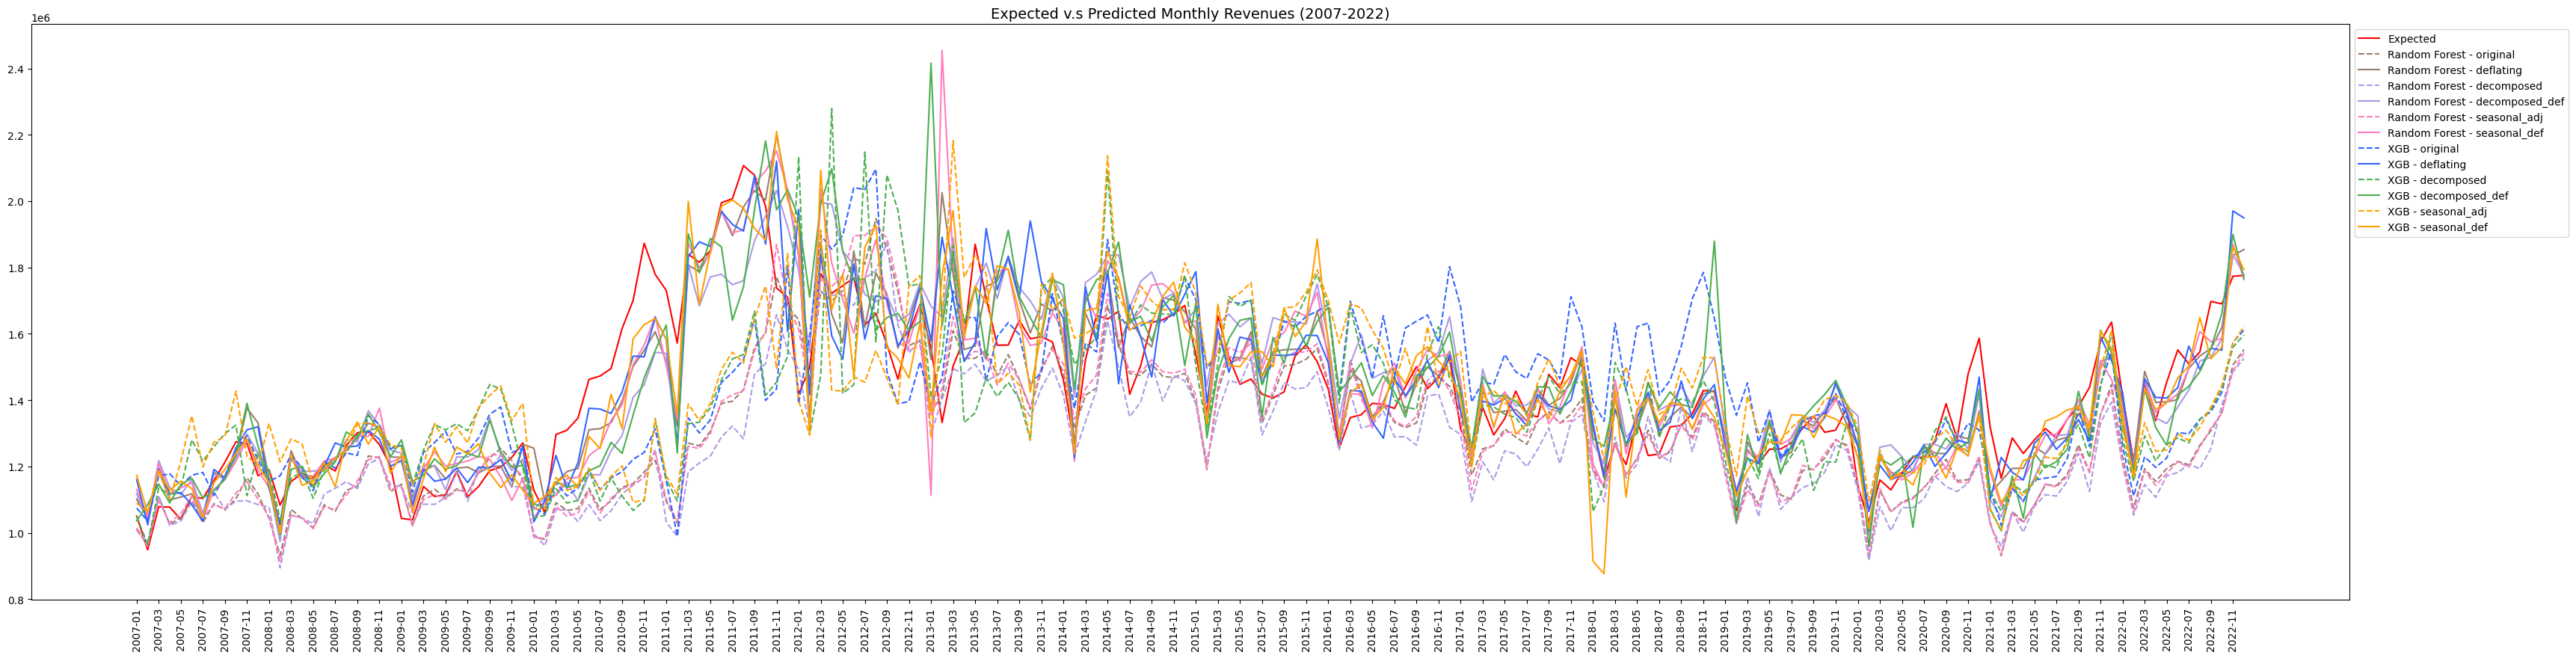

In [31]:
plotExpectedPredictedRevenues(org_data, pred_rf, pred_xgb, start_y)

#### **8.1.2 分模型畫圖**

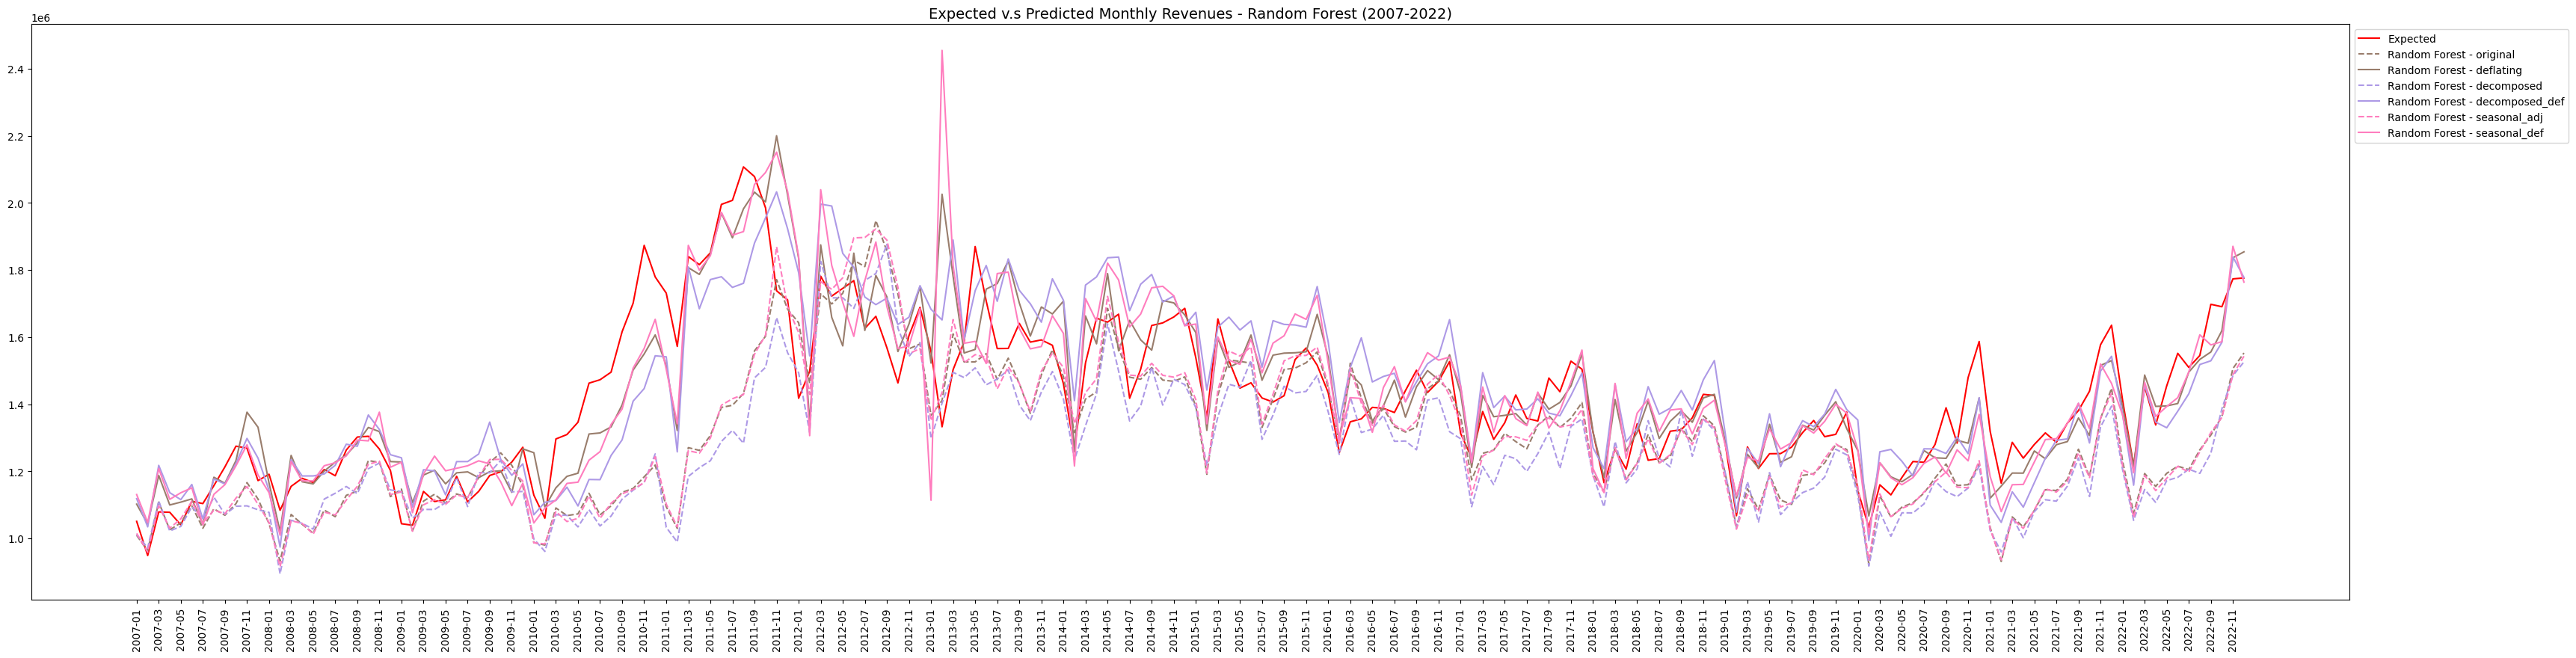

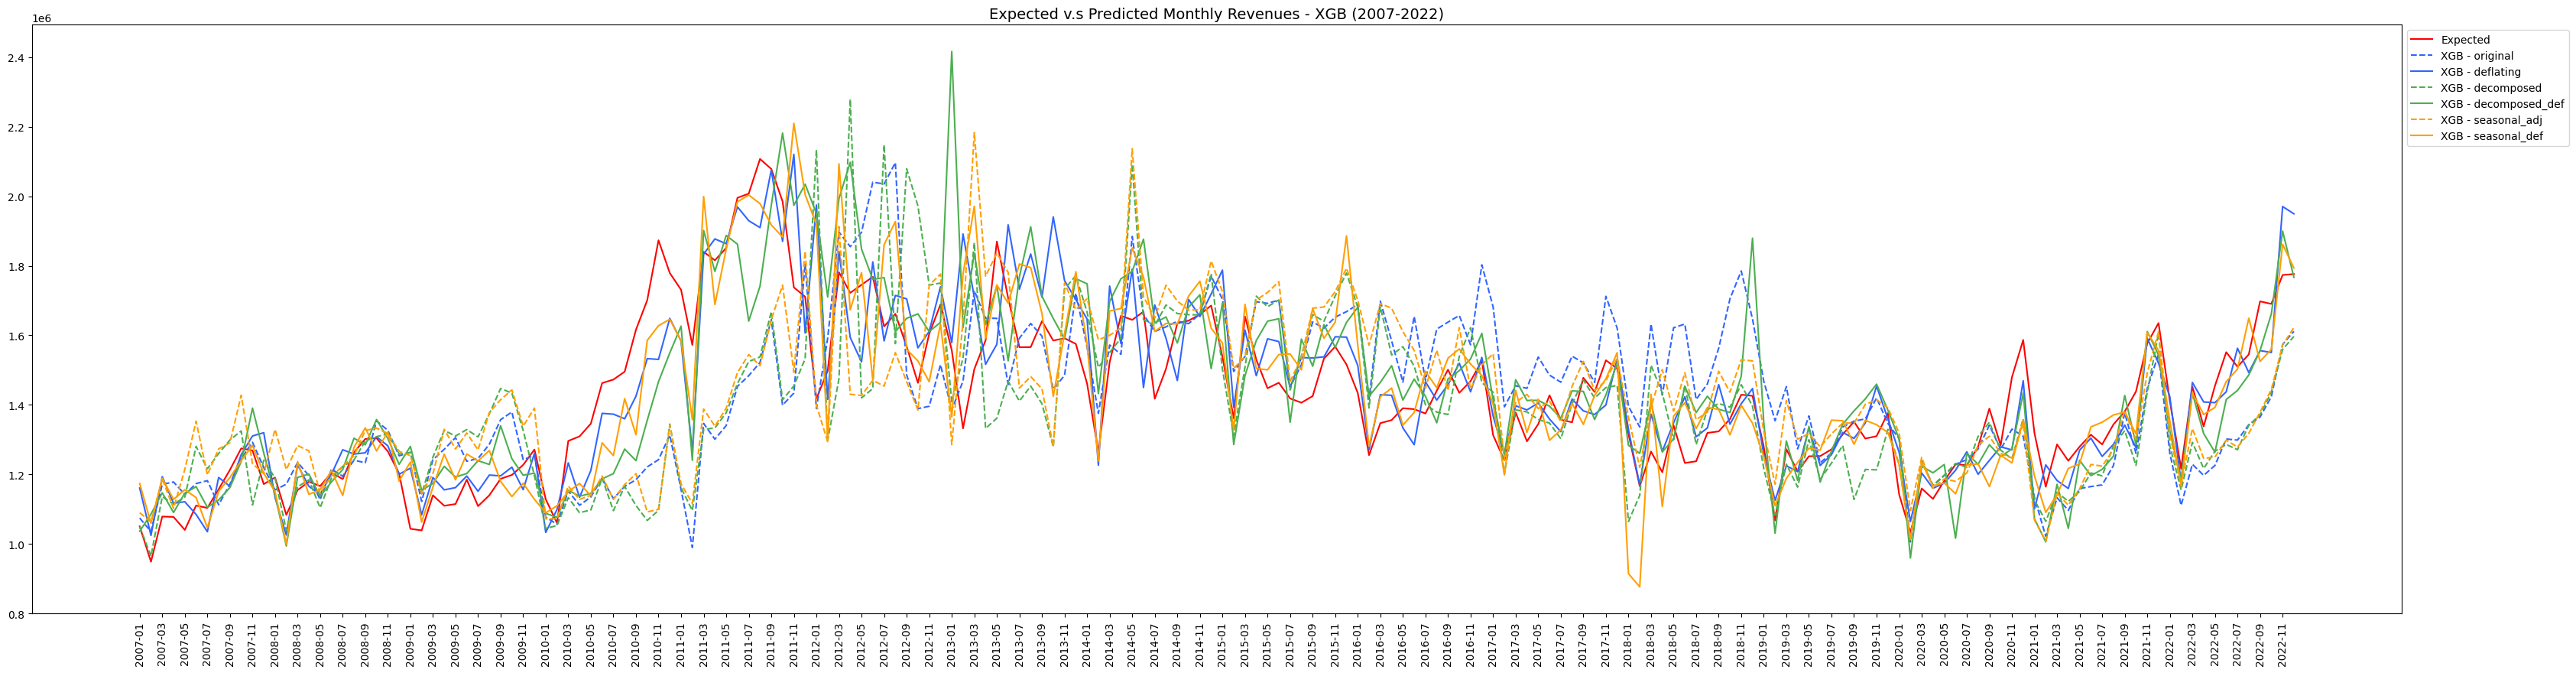

In [32]:
plotModelExpectedPredictedRevenues(org_data, pred_rf, 'rf', start_y)
plotModelExpectedPredictedRevenues(org_data, pred_xgb, 'xgb', start_y)

### **8.2 Scores: RMSE, MAPE, MAE, MAE%**

*   RMSE (Root Mean Square Error)

  $RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n(\hat{y}_i - y_i)^2}$

<br>

*   MAE (Mean Absolute Error)

  $MAE = \frac{1}{n}\sum_{i=1}^n|\hat{y}_i - y_i|$

<br>

*   MAE% (MAE / mean of the sum of y_true)

  $MAE\% = \frac{\frac{1}{n}\sum_{i=1}^n|\hat{y}_i - y_i|}{\frac{1}{n}\sum_{i=1}^n y_i} = \frac{\sum_{i=1}^n|\hat{y}_i - y_i|}{\sum_{i=1}^n y_i}$

<br>

*   MAPE (Mean Absolute Percentage Error)

  $MAPE(\%) = \frac{1}{n}\sum_{i=1}^n \frac{|\hat{y}_i - y_i|}{y_i}$


#### **8.2.1 Plot All Scores**

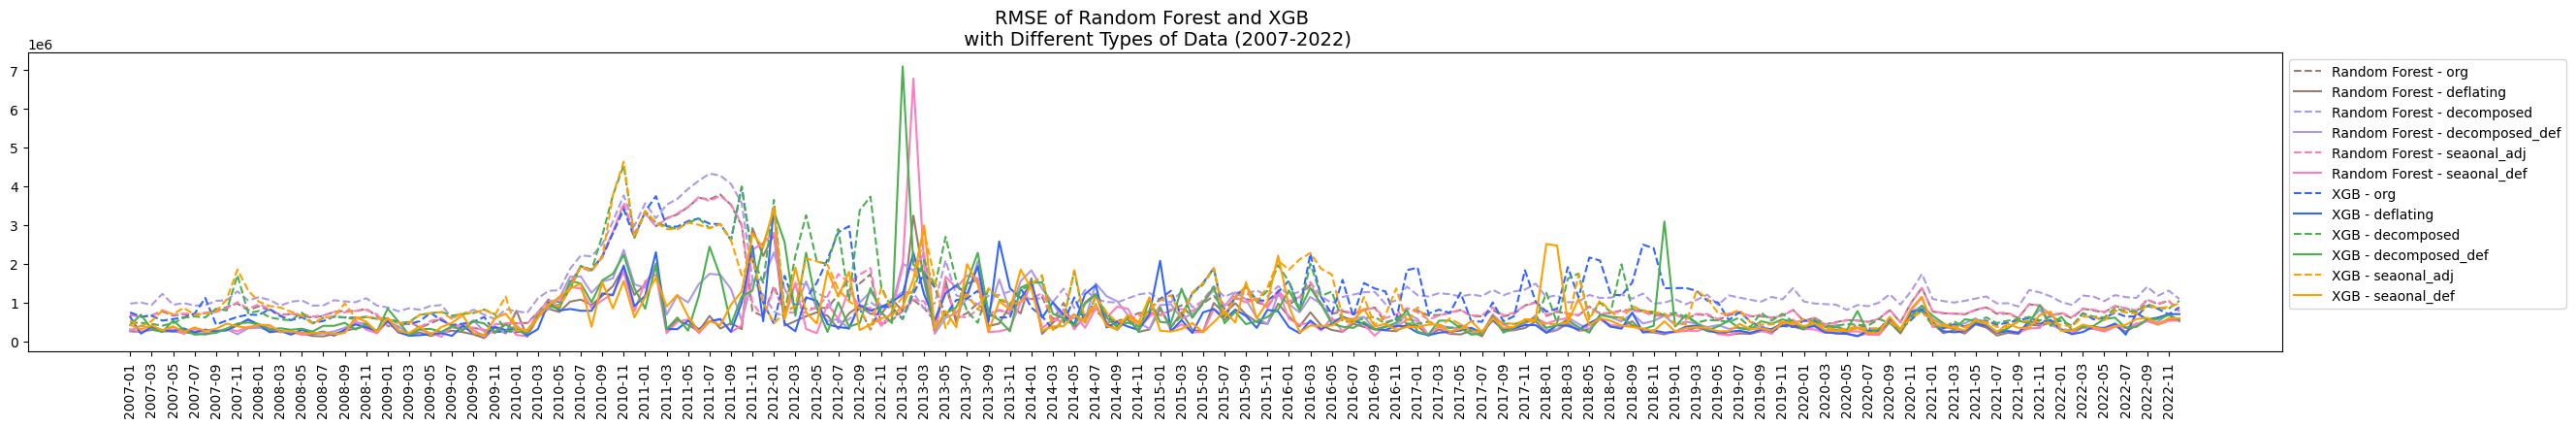

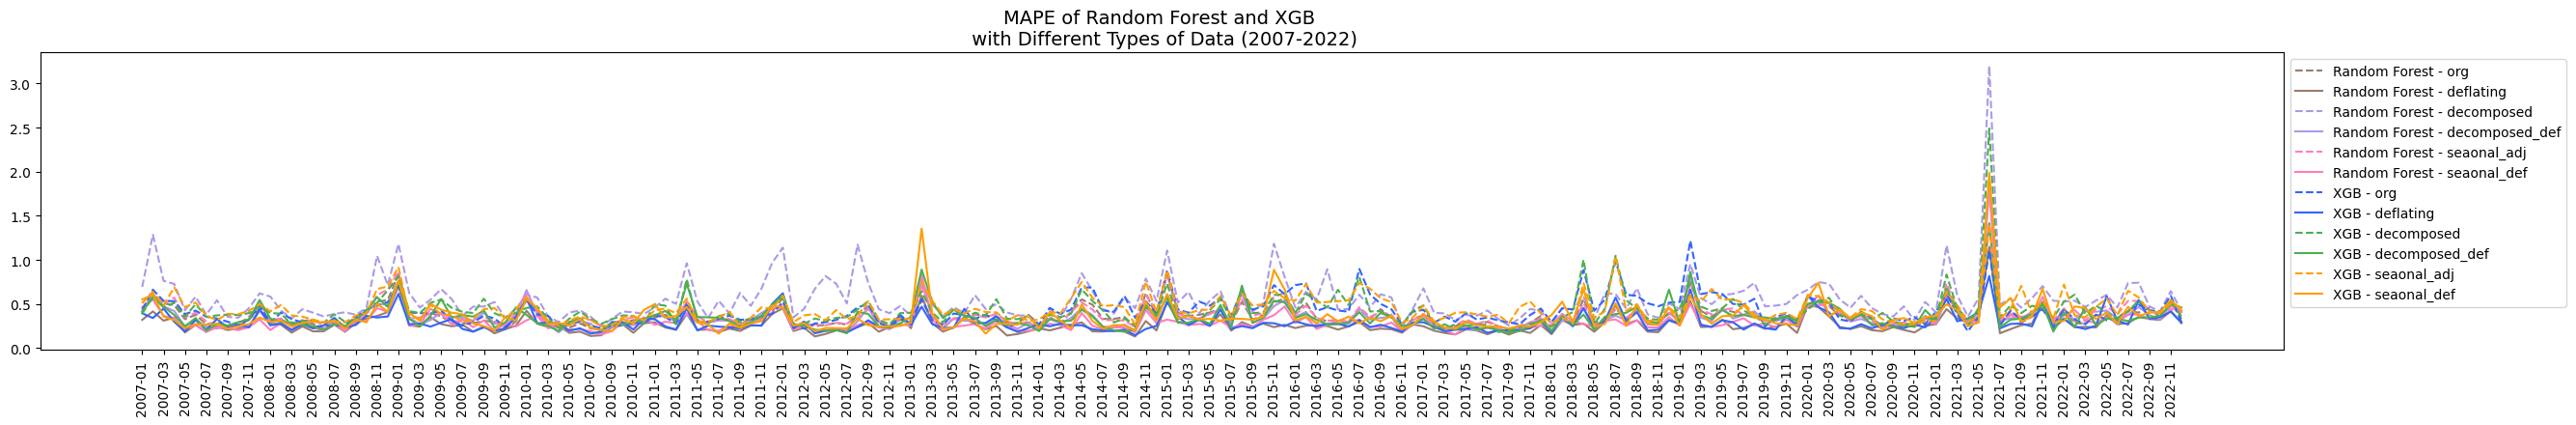

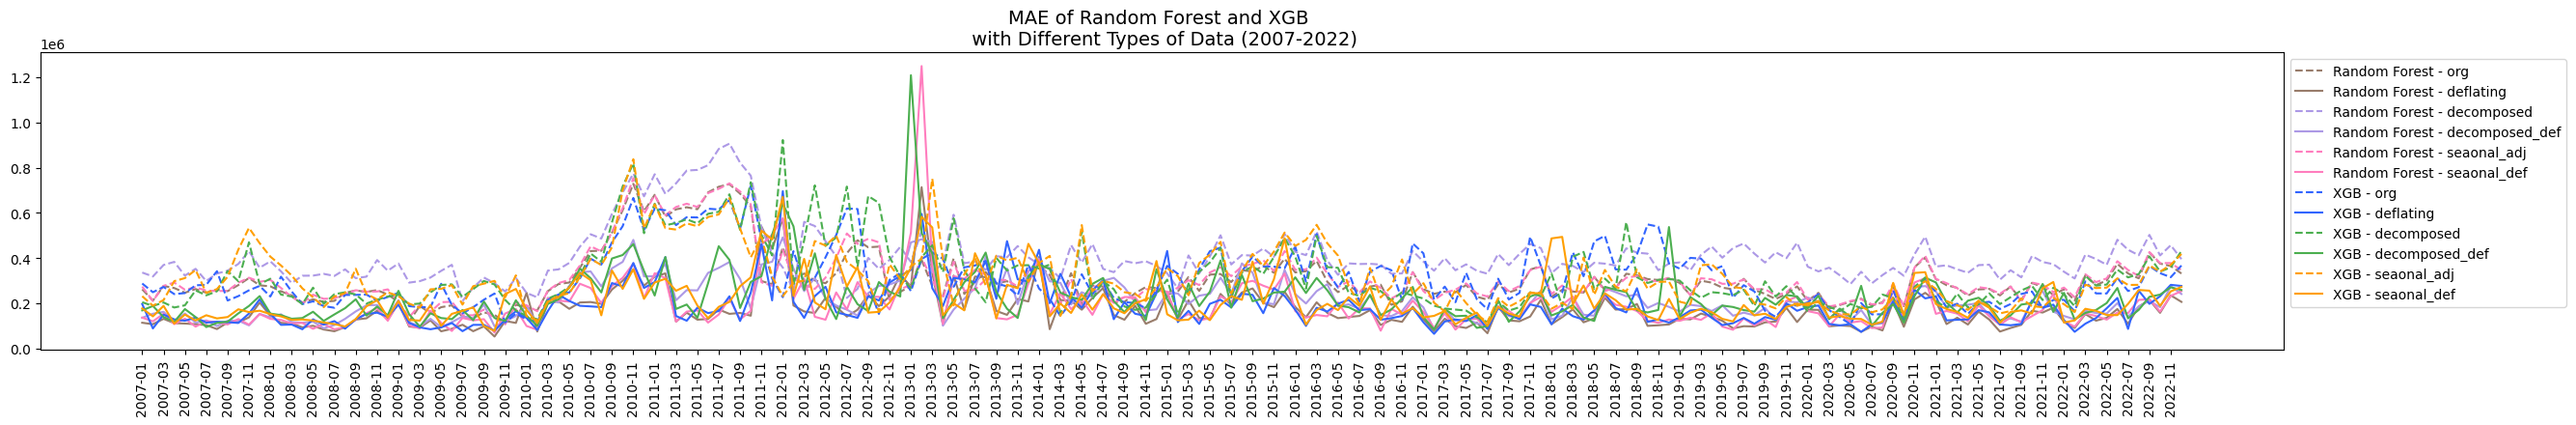

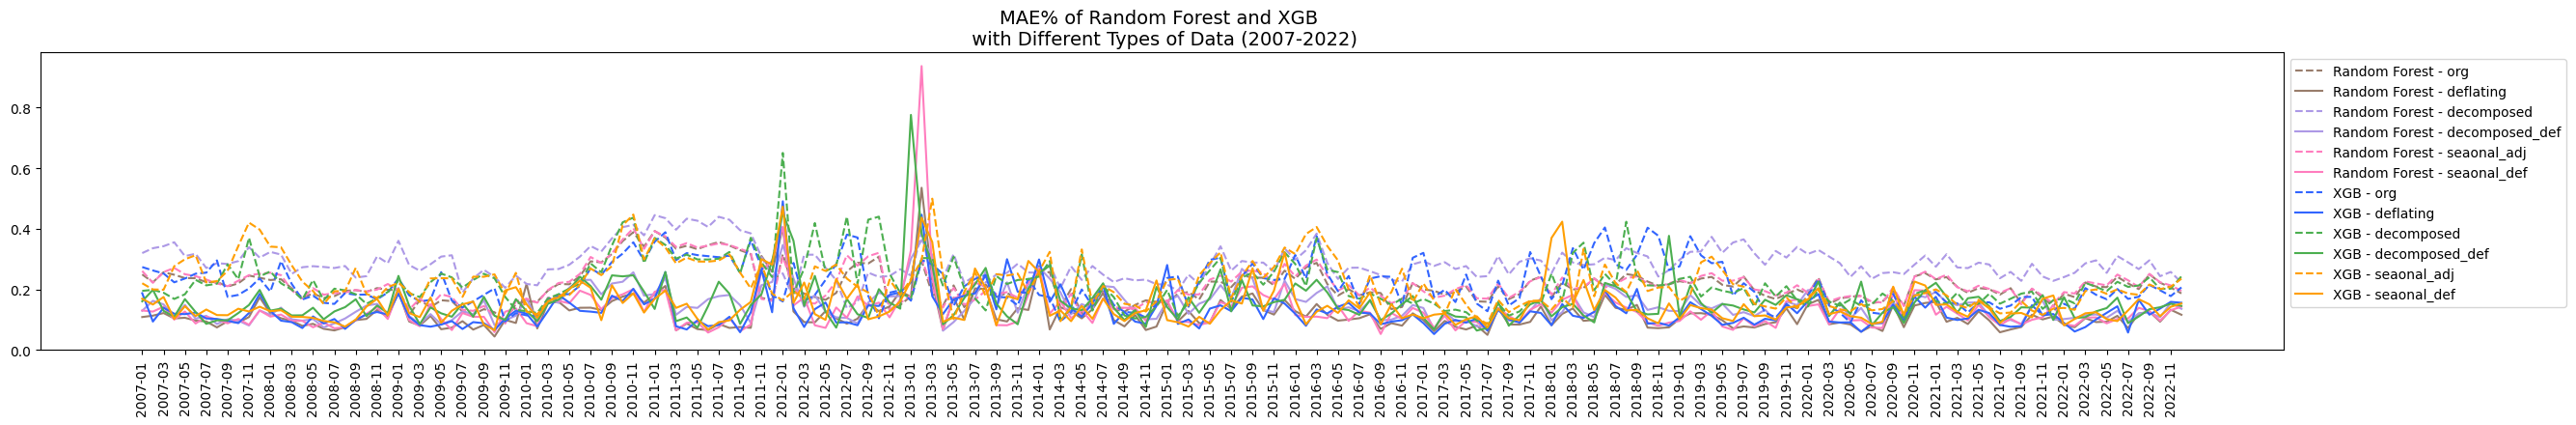

In [33]:
plotAllScores(scores_rf, scores_xgb, start_y)

#### **8.2.2 分模型畫圖**

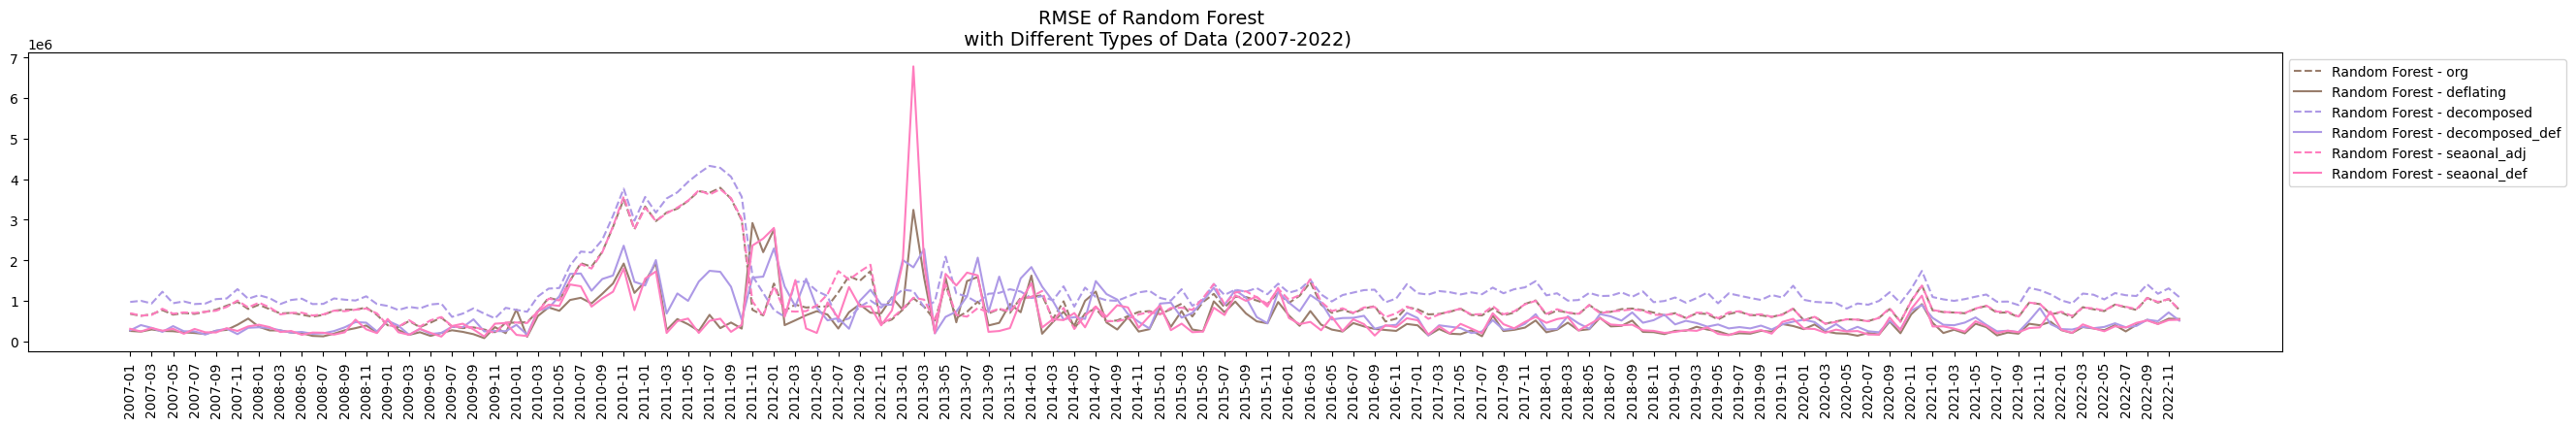

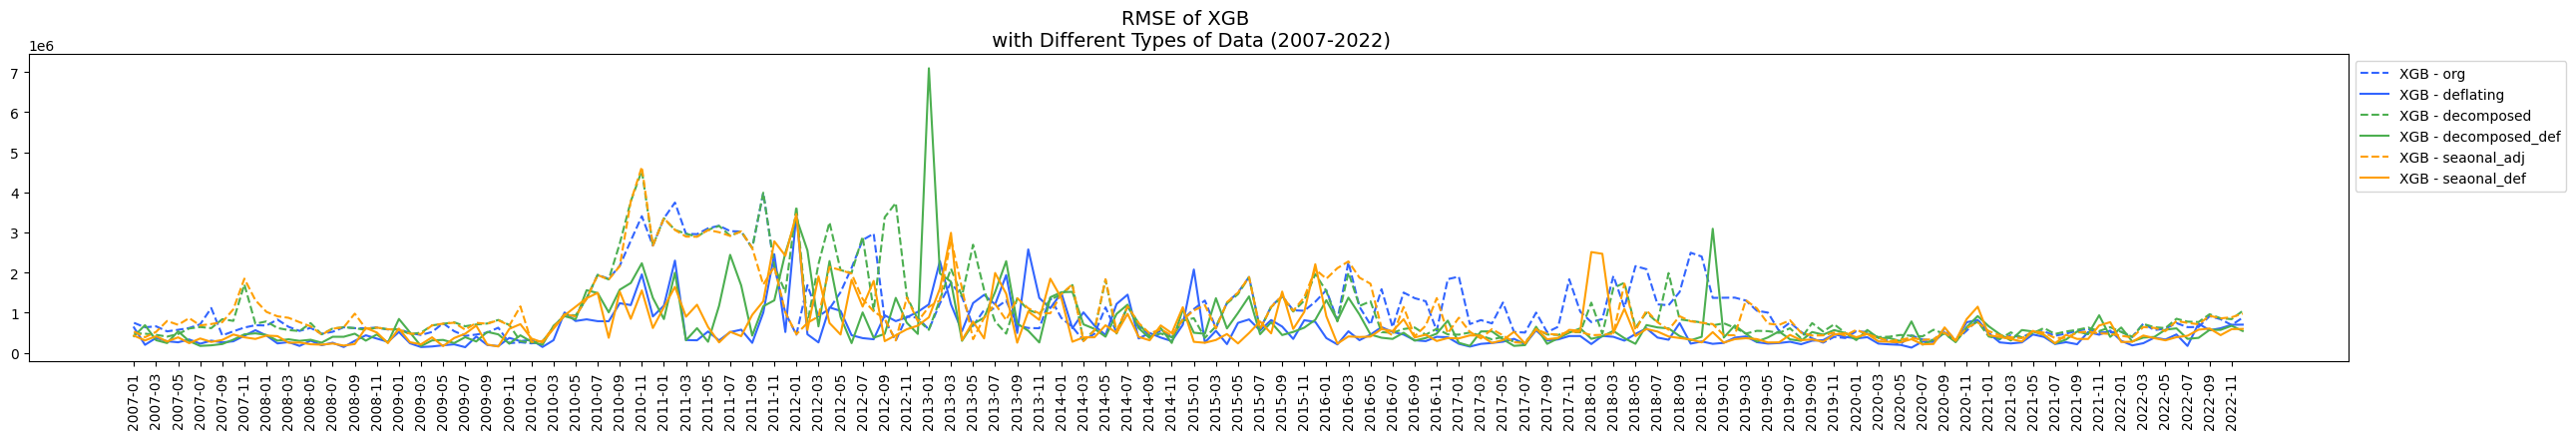

In [34]:
# RMSE
compareModelScore(scores_rf, scores_xgb, 'RMSE', start_y)  

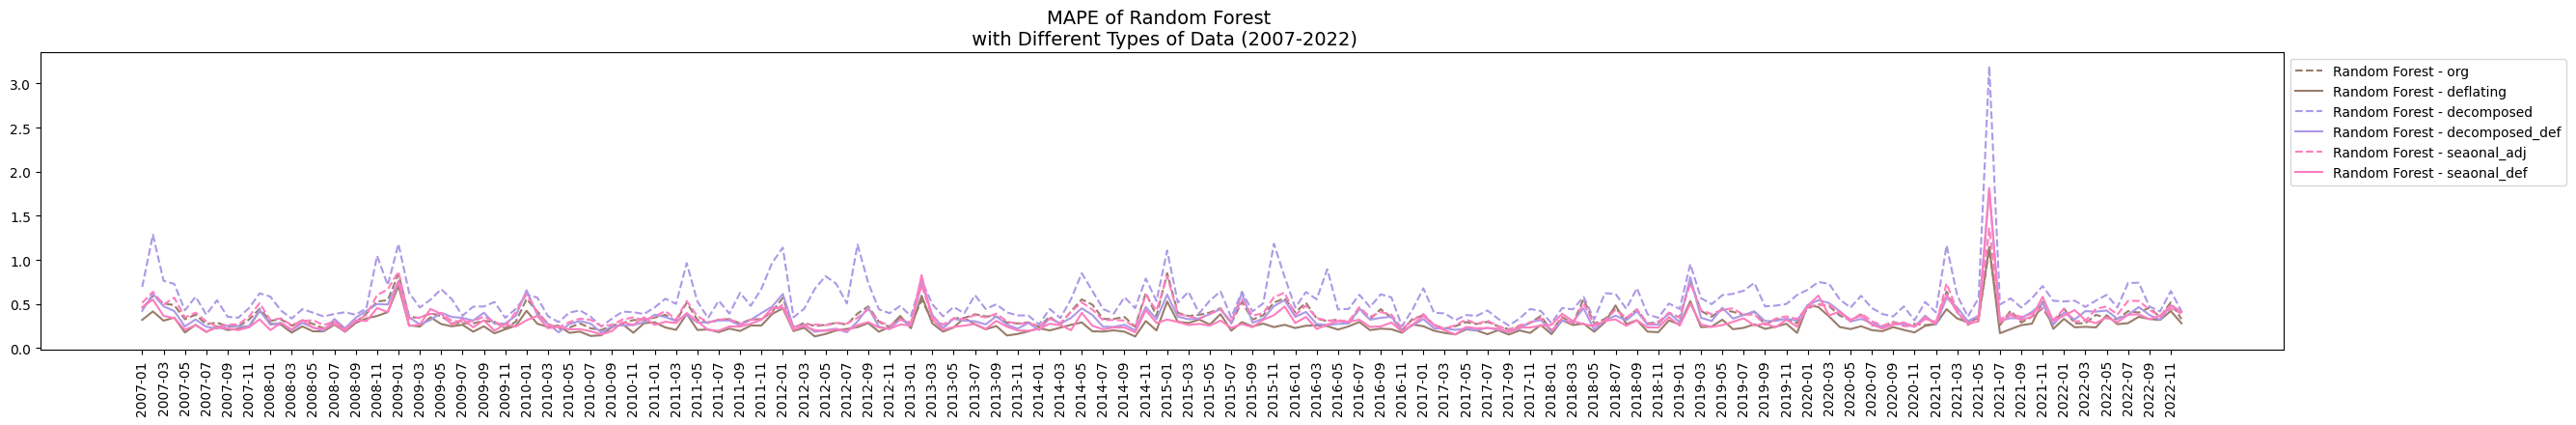

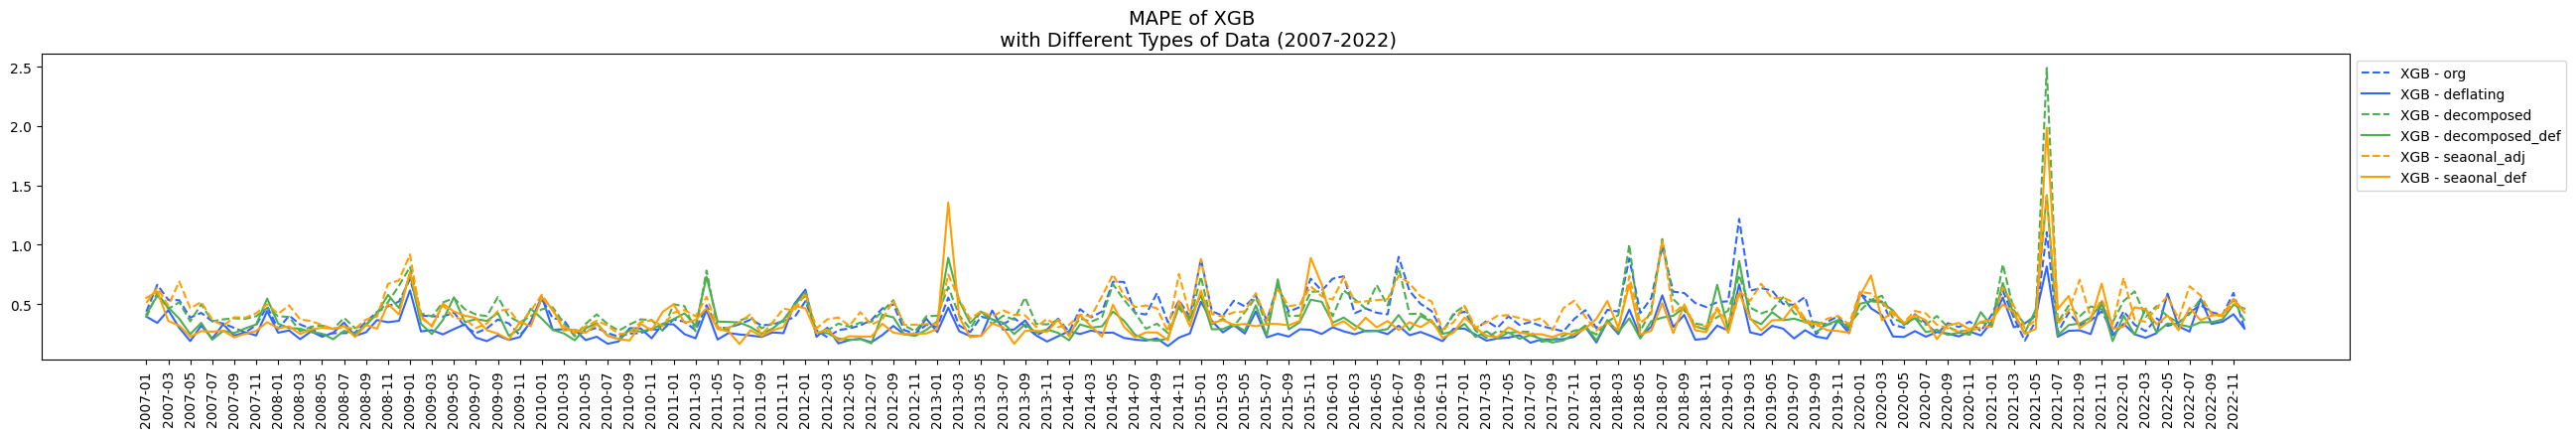

In [35]:
# MAPE
compareModelScore(scores_rf, scores_xgb, 'MAPE', start_y)  

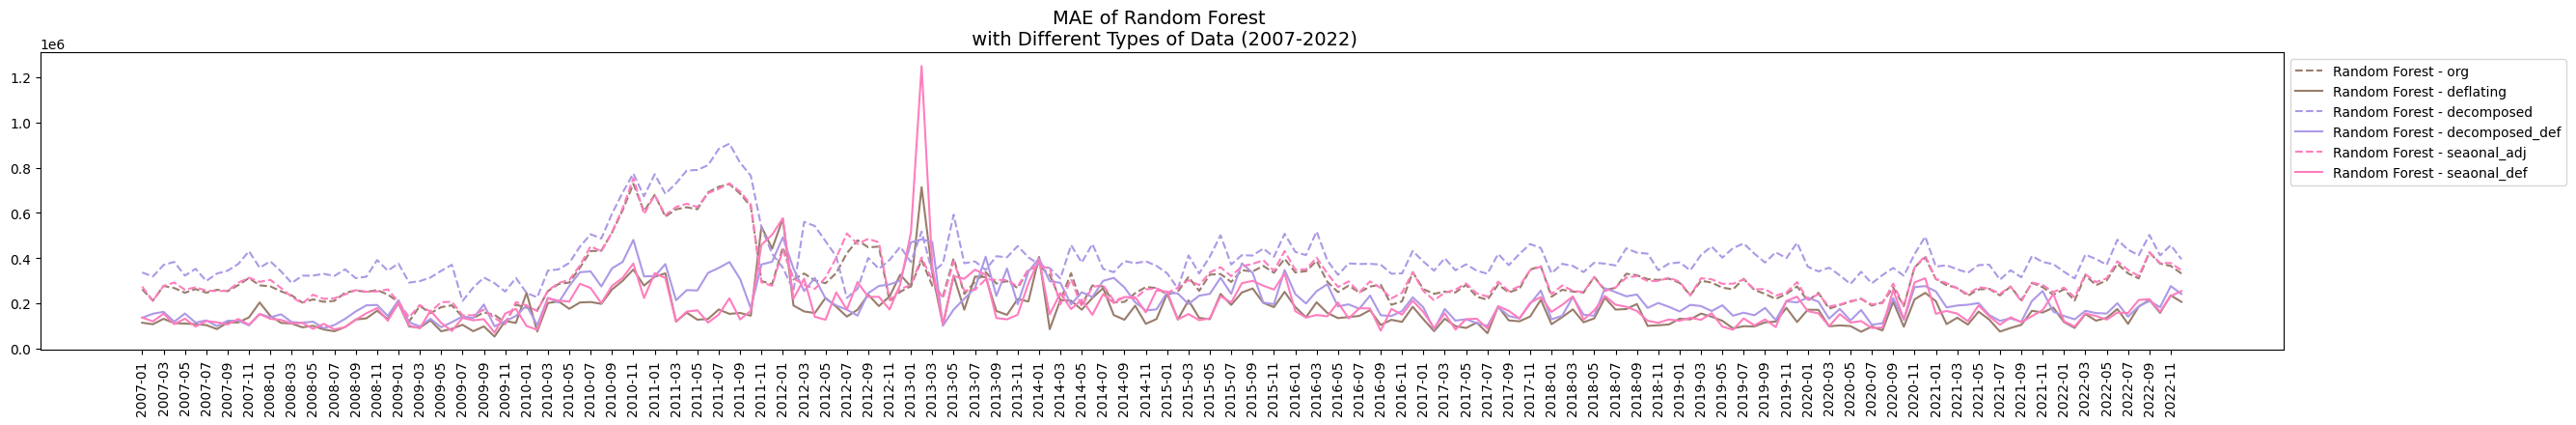

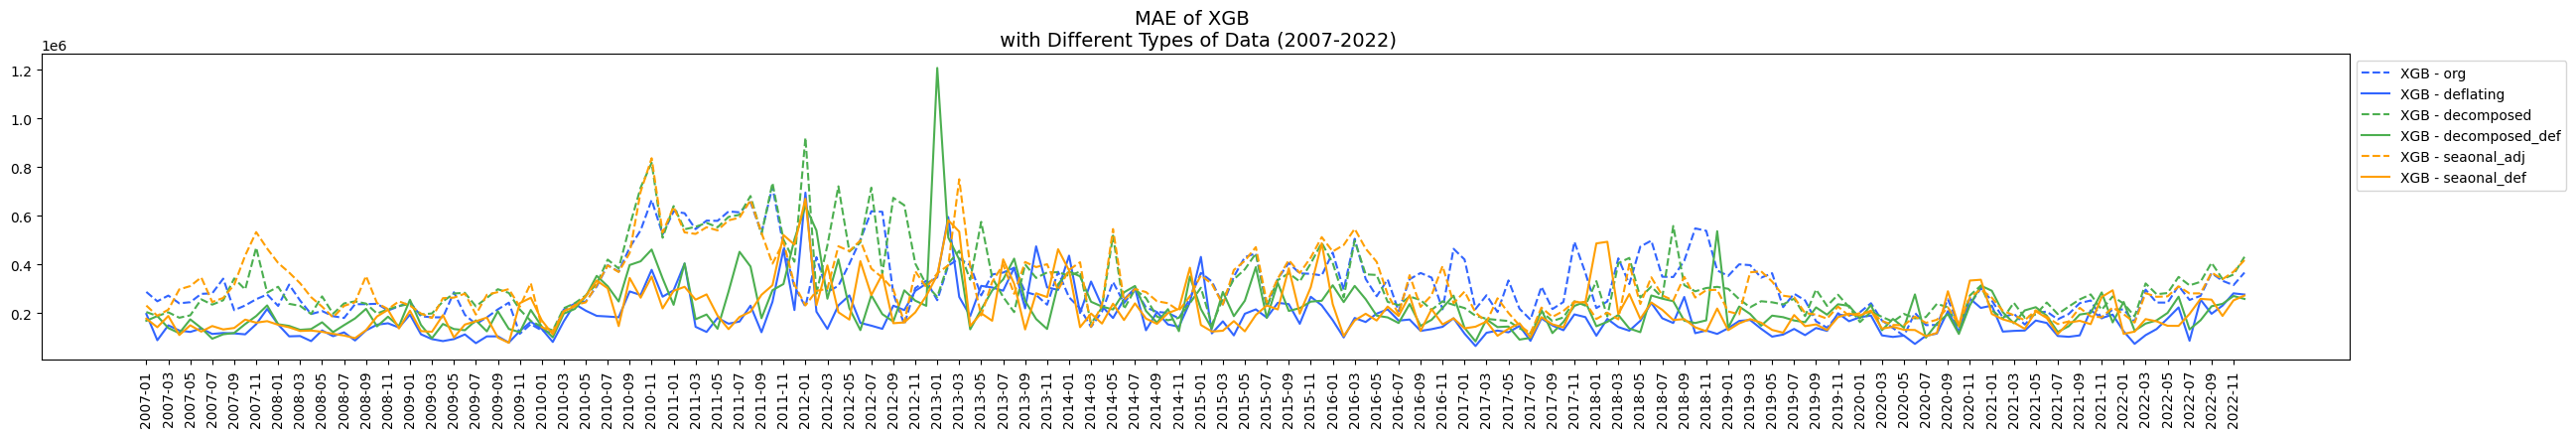

In [36]:
# MAE
compareModelScore(scores_rf, scores_xgb, 'MAE', start_y)  

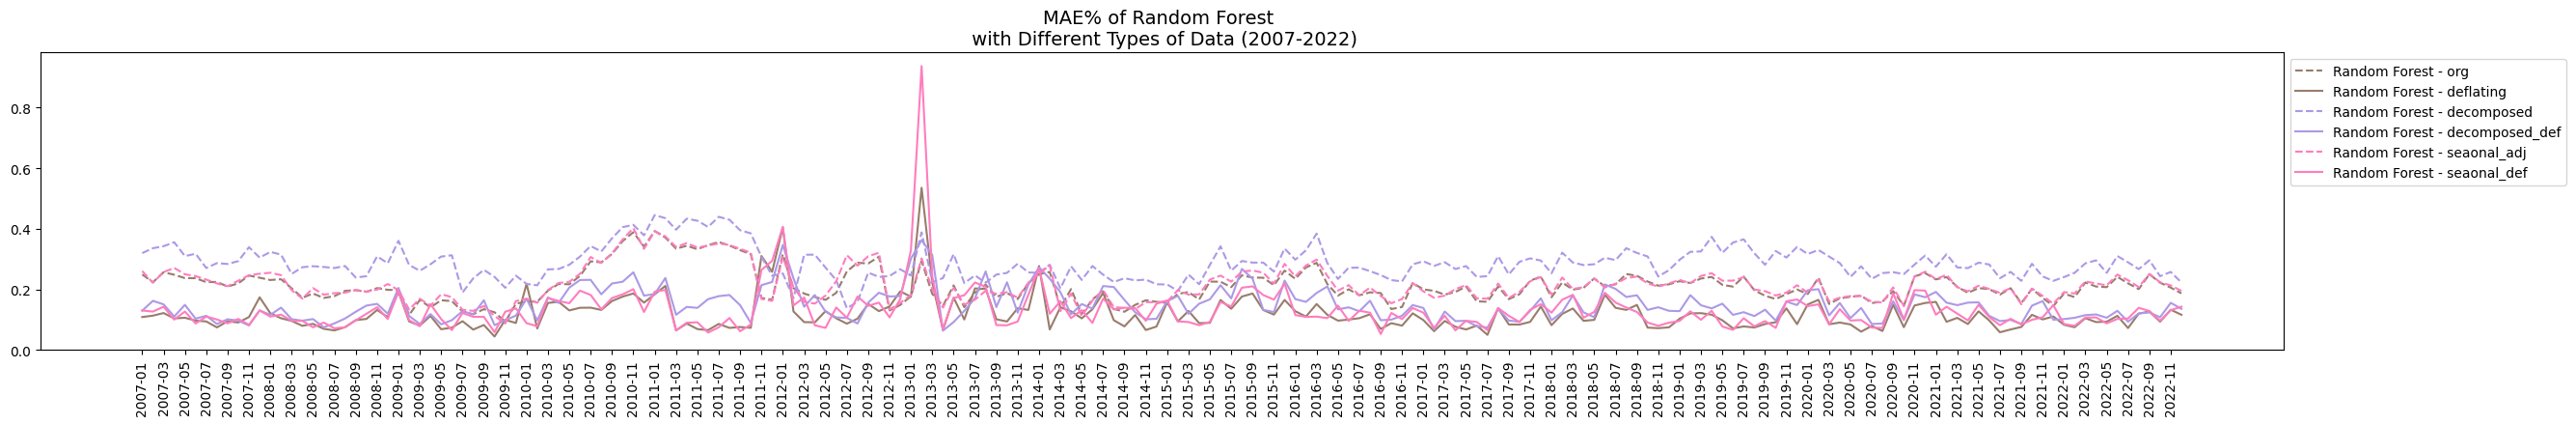

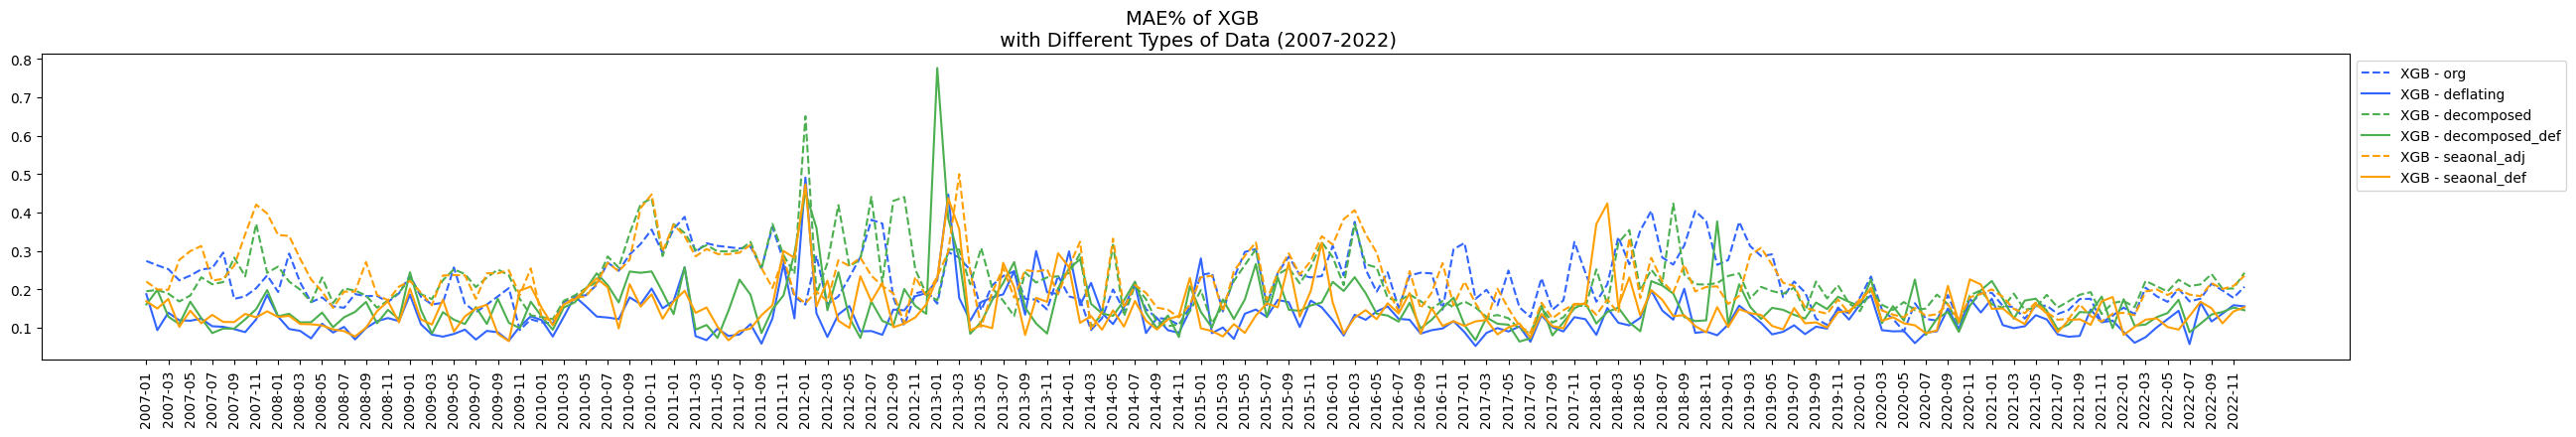

In [37]:
# MAE%
compareModelScore(scores_rf, scores_xgb, 'MAE%', start_y)  

#### **8.2.3 Boxplot**

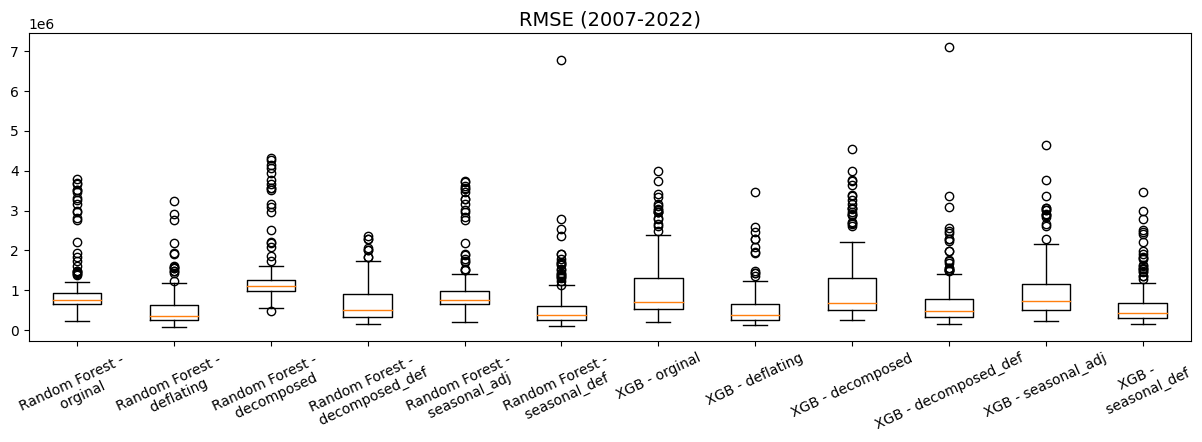

In [38]:
# RMSE
scoreBoxplotV(scores_rf, scores_xgb, 'RMSE', start_y)  

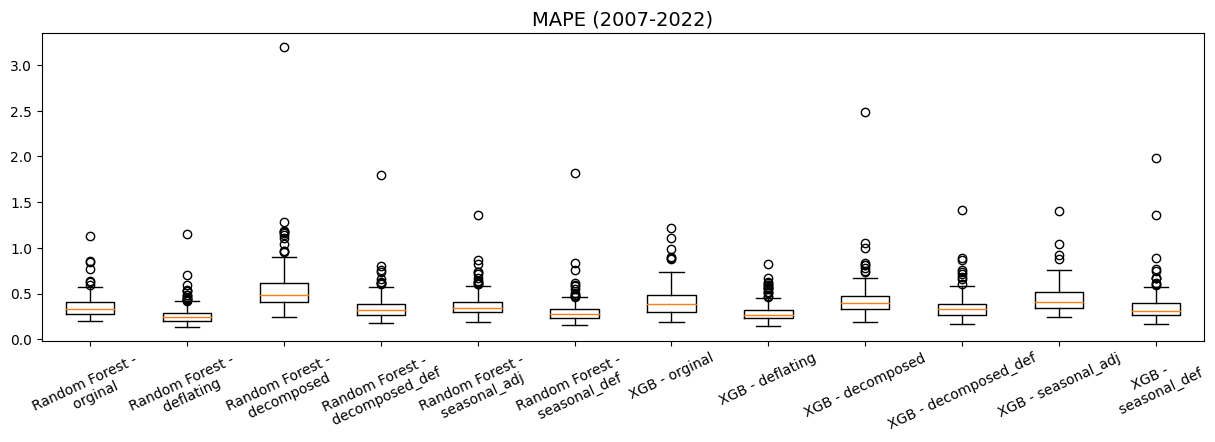

In [39]:
# MAPE
scoreBoxplotV(scores_rf, scores_xgb, 'MAPE', start_y)  

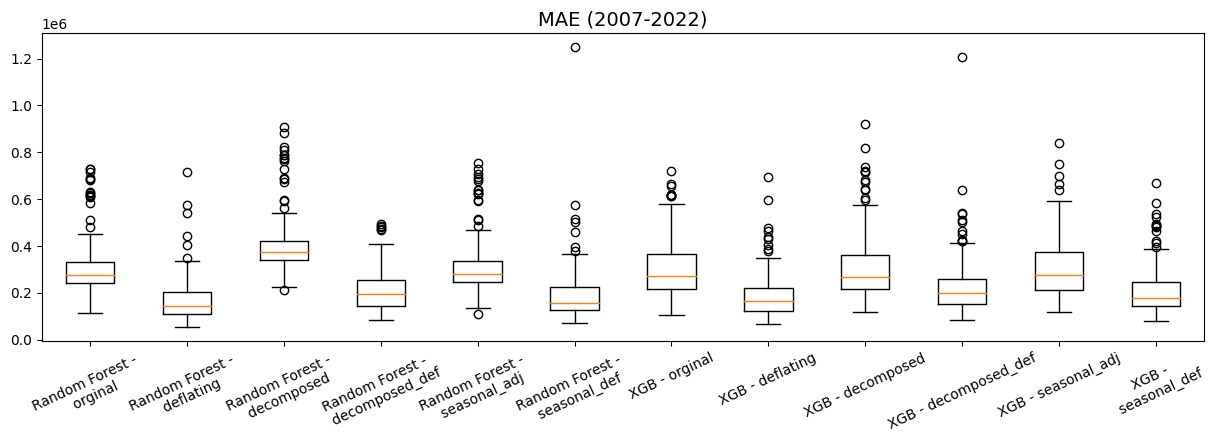

In [40]:
# MAE
scoreBoxplotV(scores_rf, scores_xgb, 'MAE', start_y)  

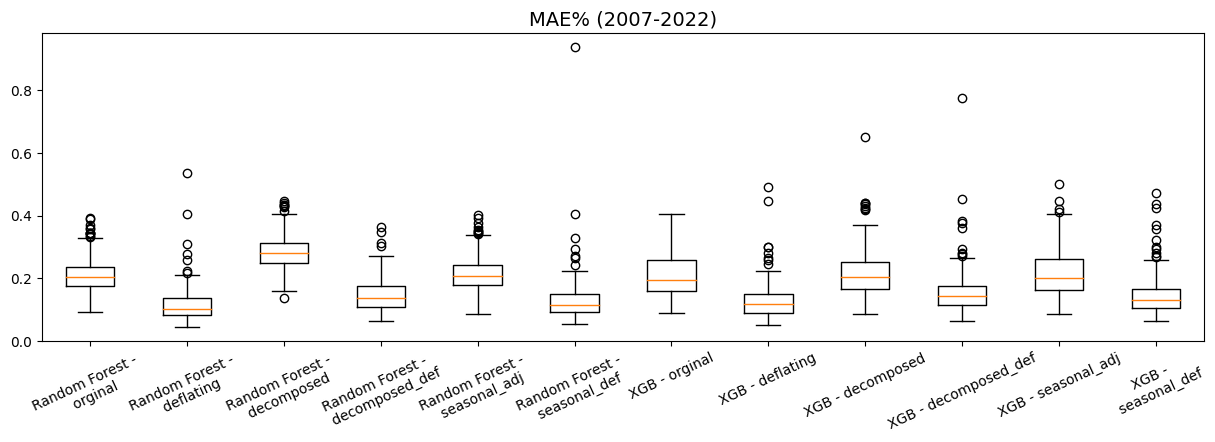

In [41]:
# MAE%
scoreBoxplotV(scores_rf, scores_xgb, 'MAE%', start_y)  

### **8.3 Feature Importance**

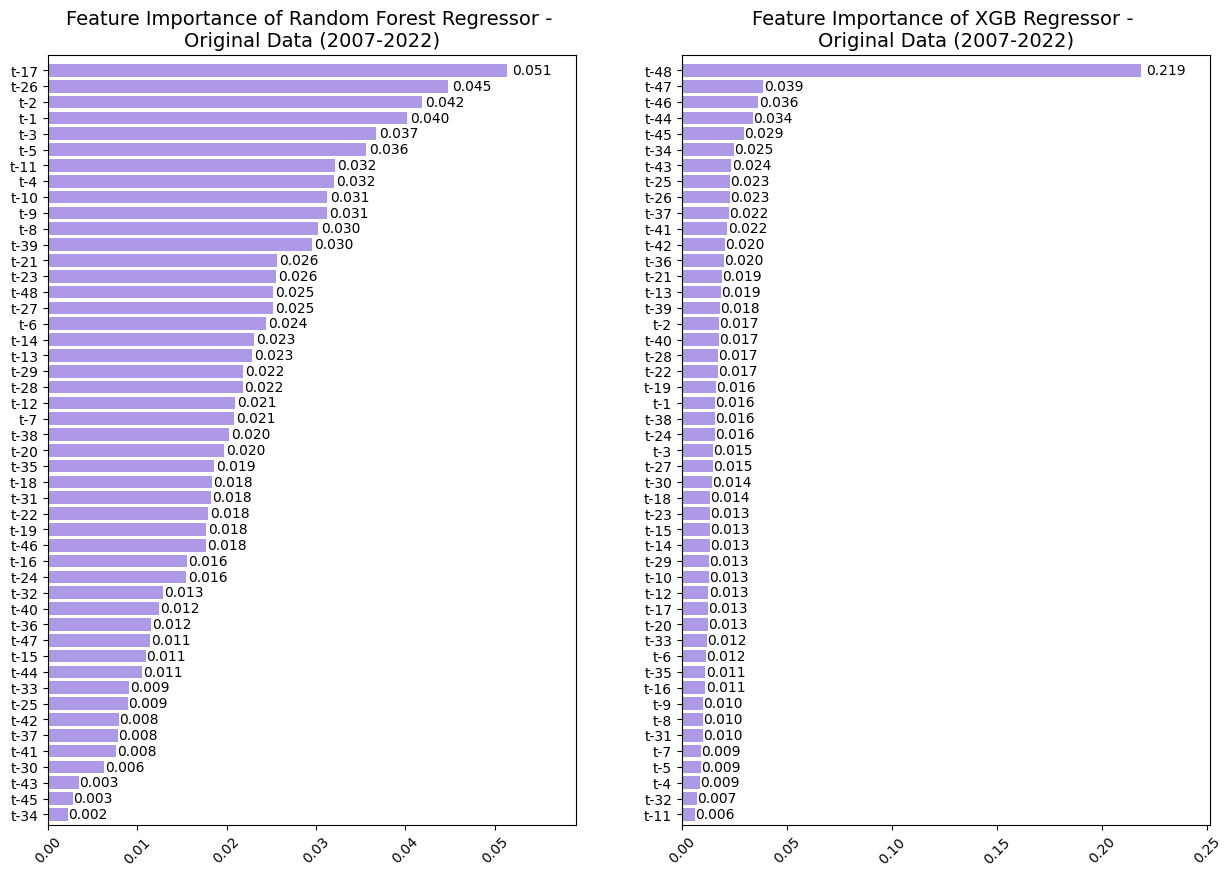

In [42]:
plotFeatureImportance(feature_importance_rf['org']['org'], feature_importance_xgb['org']['org'], 'org', start_y, 48)

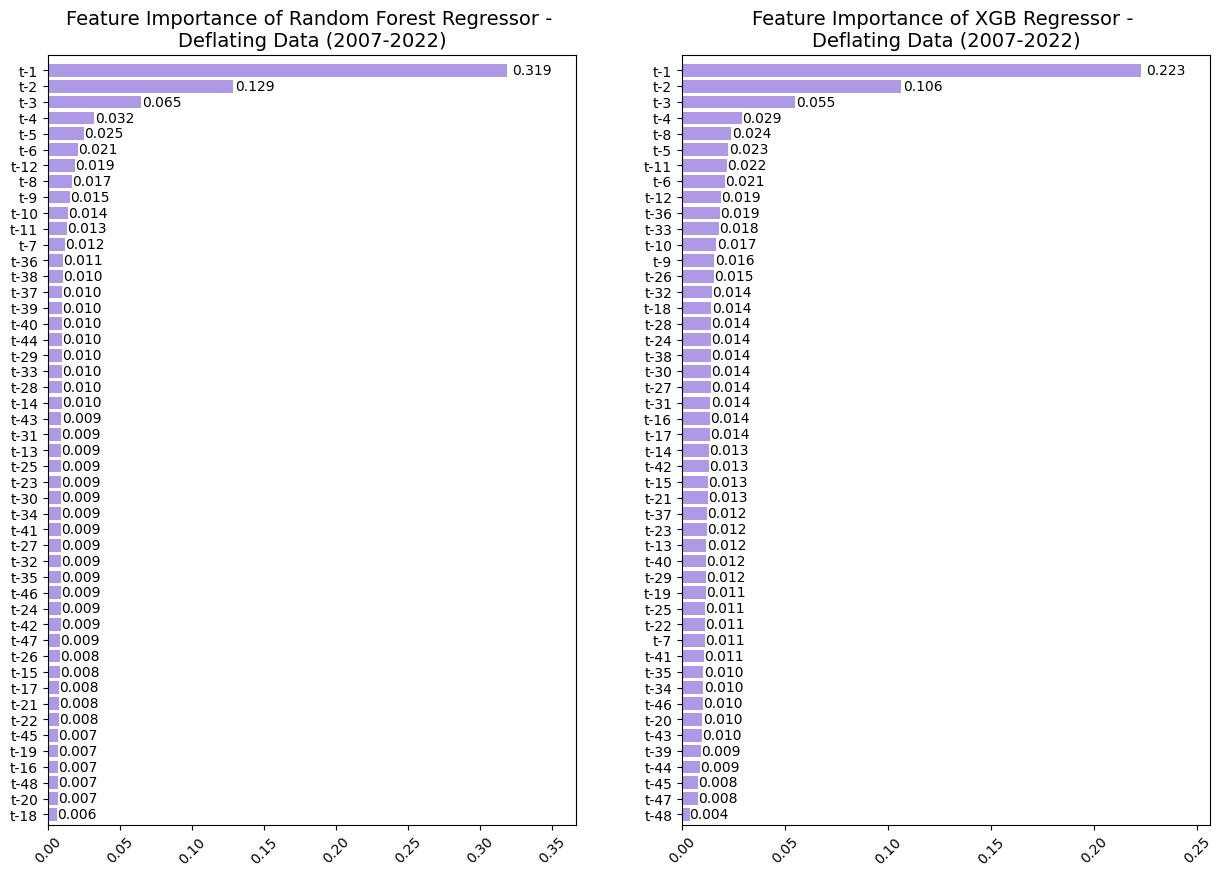

In [43]:
plotFeatureImportance(feature_importance_rf['def']['org'], feature_importance_xgb['def']['org'], 'def', start_y, 48)

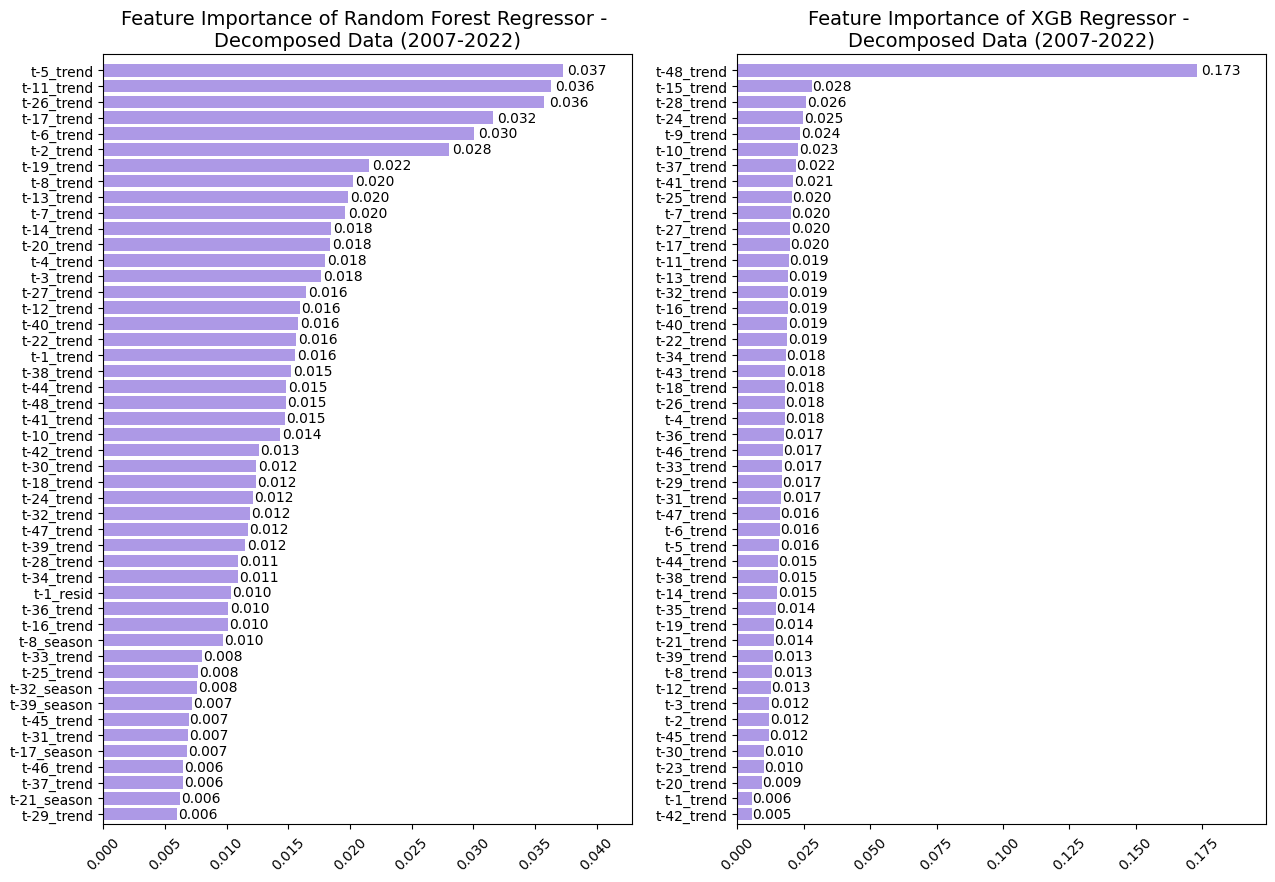

In [44]:
plotFeatureImportance(feature_importance_rf['org']['dec'], feature_importance_xgb['org']['dec'], 'dec', start_y, 48)

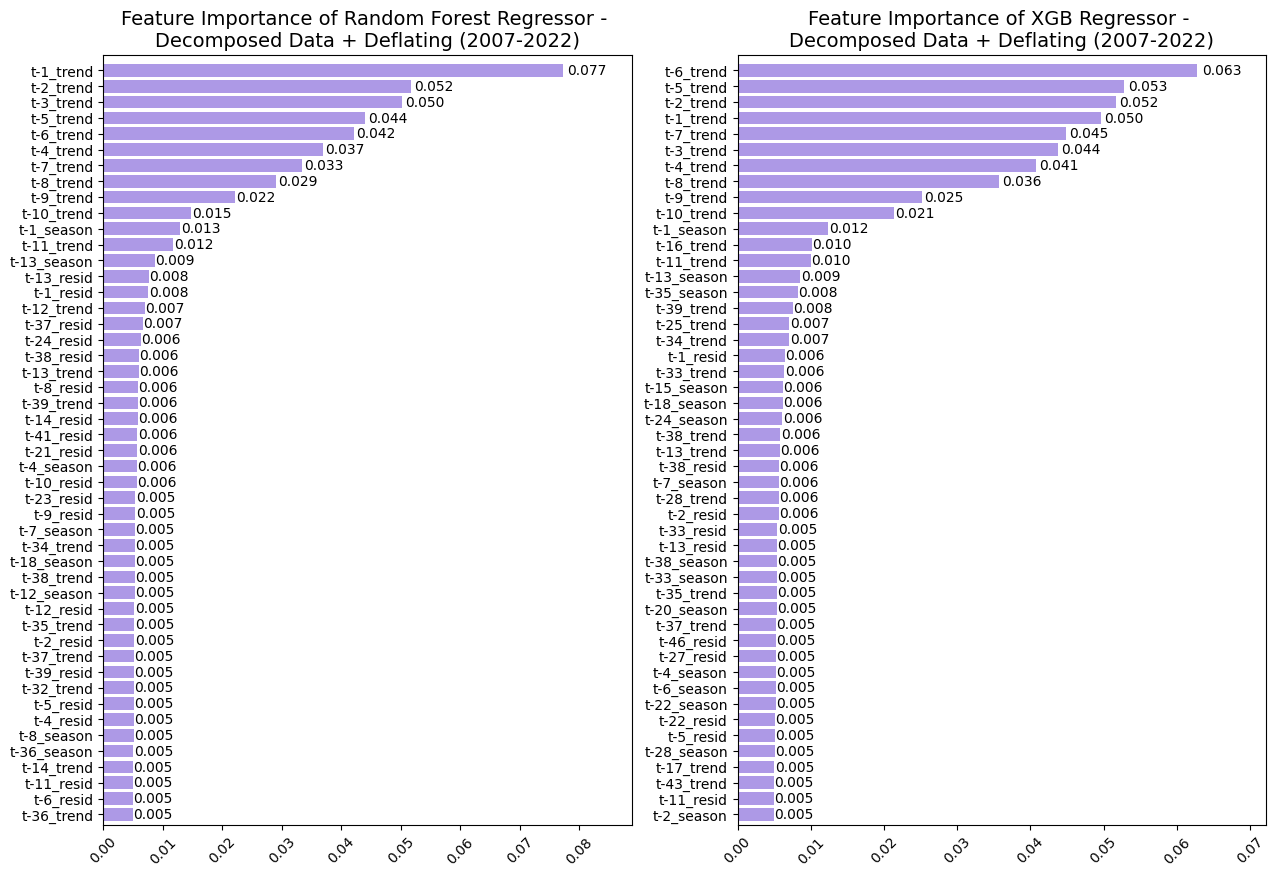

In [45]:
plotFeatureImportance(feature_importance_rf['def']['dec'], feature_importance_xgb['def']['dec'], 'dec_def', start_y, 48)

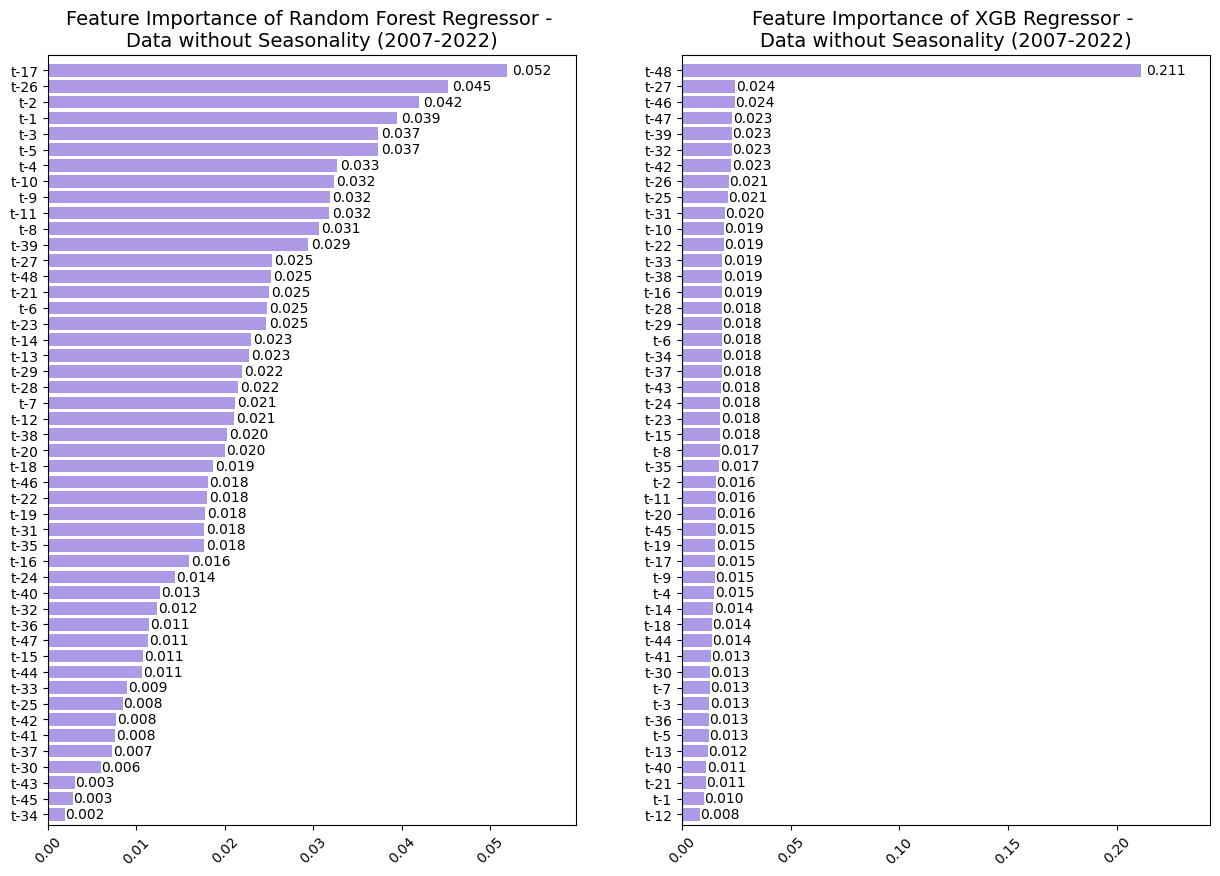

In [46]:
plotFeatureImportance(feature_importance_rf['org']['season'], feature_importance_xgb['org']['season'], 'season', start_y, 48)

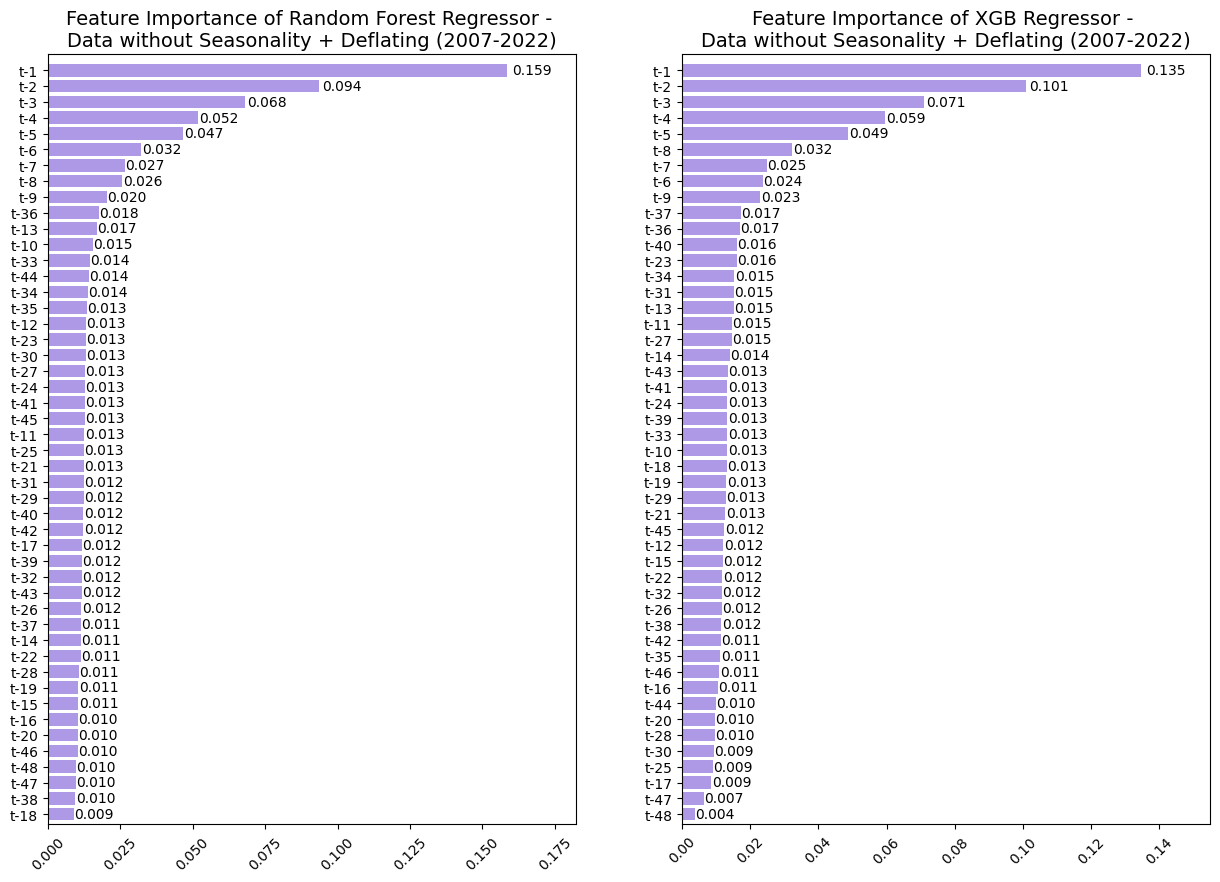

In [47]:
plotFeatureImportance(feature_importance_rf['def']['season'], feature_importance_xgb['def']['season'], 'season_def', start_y, 48)

## **9. Best and Worst Model**

In [48]:
bw = BestWorstModel(scores_rf, scores_xgb)

### **9.1 各模型組合中，預測最好和最差的月份**

||modelType|dataType|scoreType|Best & Worst Month|Total|
|-|-|-|-|-|-|
|Numbers|2|6|4|2 (fixed)|2x6x4x2 = 96|

#### **9.1.1 RMSE**

In [49]:
best_rmse, worst_rmse = bw.findBestWorstForAll('RMSE')

##### **最佳月份**

In [50]:
best_rmse

modelName    dataType scoreType min_month  min_score
0   Random Forest         org      RMSE   2009-11   226995.0
4   Random Forest         def      RMSE   2009-10    80414.0
8   Random Forest         dec      RMSE   2012-07   484090.0
12  Random Forest     dec_def      RMSE   2017-02   146741.0
16  Random Forest      season      RMSE   2009-11   206265.0
20  Random Forest  season_def      RMSE   2009-06   117792.0
0             XGB         org      RMSE   2020-05   216046.0
4             XGB         def      RMSE   2020-06   127727.0
8             XGB         dec      RMSE   2010-01   255243.0
12            XGB     dec_def      RMSE   2009-03   166858.0
16            XGB      season      RMSE   2017-07   238683.0
20            XGB  season_def      RMSE   2009-10   155737.0

##### **最差月份**

In [51]:
worst_rmse

modelName    dataType scoreType max_month  max_score
0   Random Forest         org      RMSE   2011-08  3787626.0
4   Random Forest         def      RMSE   2013-02  3241916.0
8   Random Forest         dec      RMSE   2011-07  4327017.0
12  Random Forest     dec_def      RMSE   2010-11  2359154.0
16  Random Forest      season      RMSE   2011-08  3753049.0
20  Random Forest  season_def      RMSE   2013-02  6780690.0
0             XGB         org      RMSE   2011-10  3989115.0
4             XGB         def      RMSE   2012-01  3465703.0
8             XGB         dec      RMSE   2010-11  4542675.0
12            XGB     dec_def      RMSE   2013-01  7095736.0
16            XGB      season      RMSE   2010-11  4634749.0
20            XGB  season_def      RMSE   2012-01  3459943.0

#### **9.1.2 MAPE**

In [52]:
best_mape, worst_mape = bw.findBestWorstForAll('MAPE')

##### **最佳月份**

In [53]:
best_mape

modelName    dataType scoreType min_month  min_score
3   Random Forest         org      MAPE   2018-01     0.1956
7   Random Forest         def      MAPE   2014-10     0.1322
11  Random Forest         dec      MAPE   2010-08     0.2465
15  Random Forest     dec_def      MAPE   2010-08     0.1761
19  Random Forest      season      MAPE   2018-01     0.1926
23  Random Forest  season_def      MAPE   2017-04     0.1553
3             XGB         org      MAPE   2021-04     0.1918
7             XGB         def      MAPE   2014-10     0.1469
11            XGB         dec      MAPE   2017-08     0.1826
15            XGB     dec_def      MAPE   2012-07     0.1697
19            XGB      season      MAPE   2011-09     0.2416
23            XGB  season_def      MAPE   2011-07     0.1635

##### **最差月份**

In [54]:
worst_mape

modelName    dataType scoreType max_month  max_score
3   Random Forest         org      MAPE   2021-06     1.1250
7   Random Forest         def      MAPE   2021-06     1.1483
11  Random Forest         dec      MAPE   2021-06     3.1971
15  Random Forest     dec_def      MAPE   2021-06     1.7959
19  Random Forest      season      MAPE   2021-06     1.3578
23  Random Forest  season_def      MAPE   2021-06     1.8136
3             XGB         org      MAPE   2019-02     1.2182
7             XGB         def      MAPE   2021-06     0.8176
11            XGB         dec      MAPE   2021-06     2.4901
15            XGB     dec_def      MAPE   2021-06     1.4168
19            XGB      season      MAPE   2021-06     1.4084
23            XGB  season_def      MAPE   2021-06     1.9863

#### **9.1.3 MAE**

In [55]:
best_mae, worst_mae = bw.findBestWorstForAll('MAE')

##### **最佳月份**

In [56]:
best_mae

modelName    dataType scoreType min_month  min_score
1   Random Forest         org       MAE   2009-11   114480.0
5   Random Forest         def       MAE   2009-10    53334.0
9   Random Forest         dec       MAE   2009-07   210270.0
13  Random Forest     dec_def       MAE   2017-02    84025.0
17  Random Forest      season       MAE   2009-11   107156.0
21  Random Forest  season_def       MAE   2009-10    70651.0
1             XGB         org       MAE   2020-05   107064.0
5             XGB         def       MAE   2017-02    65206.0
9             XGB         dec       MAE   2017-07   117383.0
13            XGB     dec_def       MAE   2017-02    84203.0
17            XGB      season       MAE   2017-07   117284.0
21            XGB  season_def       MAE   2009-10    78372.0

##### **最差月份**

In [57]:
worst_mae

modelName    dataType scoreType max_month  max_score
1   Random Forest         org       MAE   2010-11   728272.0
5   Random Forest         def       MAE   2013-02   713468.0
9   Random Forest         dec       MAE   2011-08   906027.0
13  Random Forest     dec_def       MAE   2012-01   491650.0
17  Random Forest      season       MAE   2010-11   753244.0
21  Random Forest  season_def       MAE   2013-02  1248841.0
1             XGB         org       MAE   2011-10   719748.0
5             XGB         def       MAE   2012-01   695755.0
9             XGB         dec       MAE   2012-01   921977.0
13            XGB     dec_def       MAE   2013-01  1208380.0
17            XGB      season       MAE   2010-11   837305.0
21            XGB  season_def       MAE   2012-01   670675.0

#### **9.1.3 MAE%**

In [58]:
best_mae_p, worst_mae_p = bw.findBestWorstForAll('MAE%')

##### **最佳月份**

In [59]:
best_mae_p

modelName    dataType scoreType min_month  min_score
2   Random Forest         org      MAE%   2009-11     0.0933
6   Random Forest         def      MAE%   2009-10     0.0445
10  Random Forest         dec      MAE%   2012-07     0.1378
14  Random Forest     dec_def      MAE%   2013-04     0.0638
18  Random Forest      season      MAE%   2009-11     0.0873
22  Random Forest  season_def      MAE%   2016-09     0.0528
2             XGB         org      MAE%   2020-05     0.0906
6             XGB         def      MAE%   2017-02     0.0526
10            XGB         dec      MAE%   2017-07     0.0865
14            XGB     dec_def      MAE%   2017-06     0.0642
18            XGB      season      MAE%   2017-07     0.0864
22            XGB  season_def      MAE%   2009-10     0.0654

##### **最差月份**

In [60]:
worst_mae_p

modelName    dataType scoreType max_month  max_score
2   Random Forest         org      MAE%   2011-01     0.3927
6   Random Forest         def      MAE%   2013-02     0.5354
10  Random Forest         dec      MAE%   2011-01     0.4452
14  Random Forest     dec_def      MAE%   2013-02     0.3626
18  Random Forest      season      MAE%   2010-11     0.4021
22  Random Forest  season_def      MAE%   2013-02     0.9371
2             XGB         org      MAE%   2018-06     0.4044
6             XGB         def      MAE%   2012-01     0.4908
10            XGB         dec      MAE%   2012-01     0.6504
14            XGB     dec_def      MAE%   2013-01     0.7760
18            XGB      season      MAE%   2013-03     0.4995
22            XGB  season_def      MAE%   2012-01     0.4731

### **9.2 Random Forest 和 XGB 各自預測最好和最差的模型組合**

||modelType|dataType|scoreType|Best & Worst Month|Total|
|-|-|-|-|-|-|
|Numbers|2|1|4|2 (fixed)|2x1x4x2 = 16|

In [61]:
imp_plot = BestWorstModelFeatureImportancePlot(feature_importance_rf, feature_importance_xgb, bw.best_rf, bw.worst_rf, bw.best_xgb, bw.worst_xgb, bw.best_all, bw.worst_all, start_y)
top_k = 5

#### **9.2.1 RMSE**

##### **最佳模型**

In [62]:
# Random Forest
bw.best_rf['RMSE']

modelName dataType scoreType min_month  min_score
4  Random Forest      def      RMSE   2009-10    80414.0

In [63]:
# XGB
bw.best_xgb['RMSE']

modelName dataType scoreType min_month  min_score
4       XGB      def      RMSE   2020-06   127727.0

##### **最差模型**

In [64]:
# Random Forest
bw.worst_rf['RMSE']

modelName    dataType scoreType max_month  max_score
20  Random Forest  season_def      RMSE   2013-02  6780690.0

In [65]:
# XGB
bw.worst_xgb['RMSE']

modelName dataType scoreType max_month  max_score
12       XGB  dec_def      RMSE   2013-01  7095736.0

##### **Feature Importance**



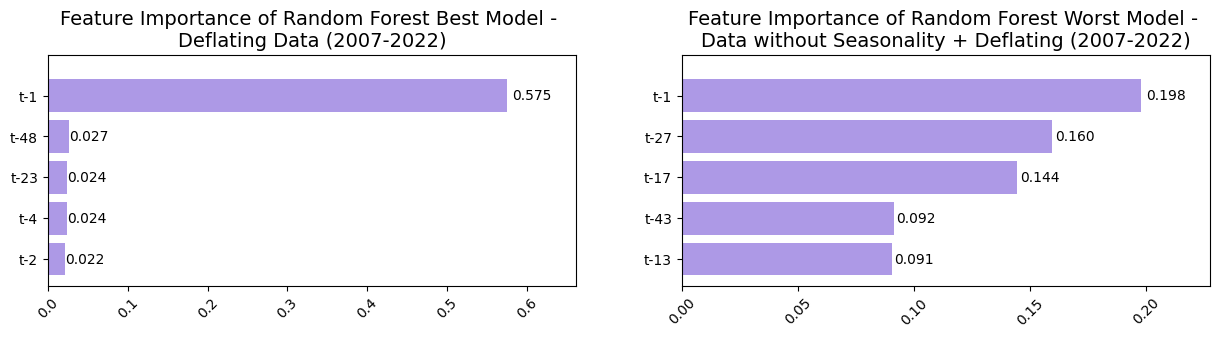

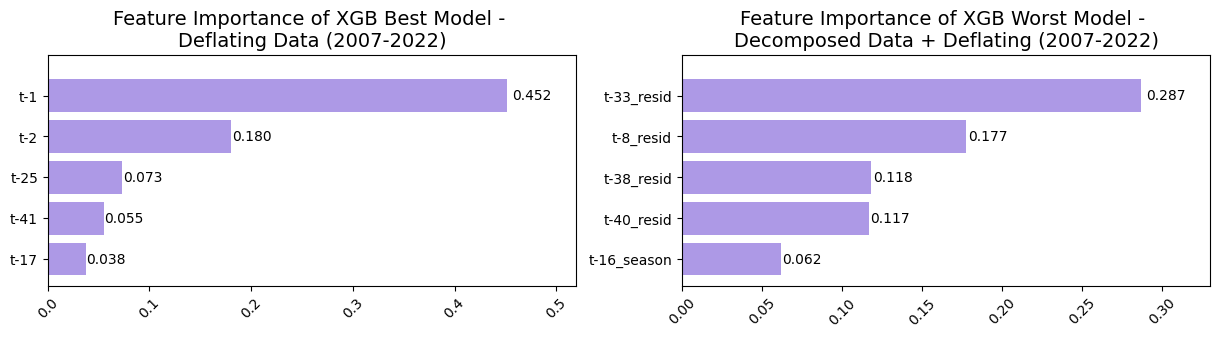

In [66]:
imp_plot.plotBestWorstFeatureImportance('RMSE', top_k)

#### **9.2.2 MAPE**

##### **最佳模型**

In [67]:
# Random Forest
bw.best_rf['MAPE']

modelName dataType scoreType min_month  min_score
7  Random Forest      def      MAPE   2014-10     0.1322

In [68]:
# XGB
bw.best_xgb['MAPE']

modelName dataType scoreType min_month  min_score
7       XGB      def      MAPE   2014-10     0.1469

##### **最差模型**

In [69]:
# Random Forest
bw.worst_rf['MAPE']

modelName dataType scoreType max_month  max_score
11  Random Forest      dec      MAPE   2021-06     3.1971

In [70]:
# XGB
bw.worst_xgb['MAPE']

modelName dataType scoreType max_month  max_score
11       XGB      dec      MAPE   2021-06     2.4901

##### **Feature Importance**



In [71]:
imp_plot.plotBestWorstFeatureImportance('MAPE', top_k)

#### **9.2.3 MAE**

##### **最佳模型**

In [72]:
# Random Forest
bw.best_rf['MAE']

modelName dataType scoreType min_month  min_score
5  Random Forest      def       MAE   2009-10    53334.0

In [73]:
# XGB
bw.best_xgb['MAE']

modelName dataType scoreType min_month  min_score
5       XGB      def       MAE   2017-02    65206.0

##### **最差模型**

In [74]:
# Random Forest
bw.worst_rf['MAE']

modelName    dataType scoreType max_month  max_score
21  Random Forest  season_def       MAE   2013-02  1248841.0

In [75]:
# XGB
bw.worst_xgb['MAE']

modelName dataType scoreType max_month  max_score
13       XGB  dec_def       MAE   2013-01  1208380.0

##### **Feature Importance**



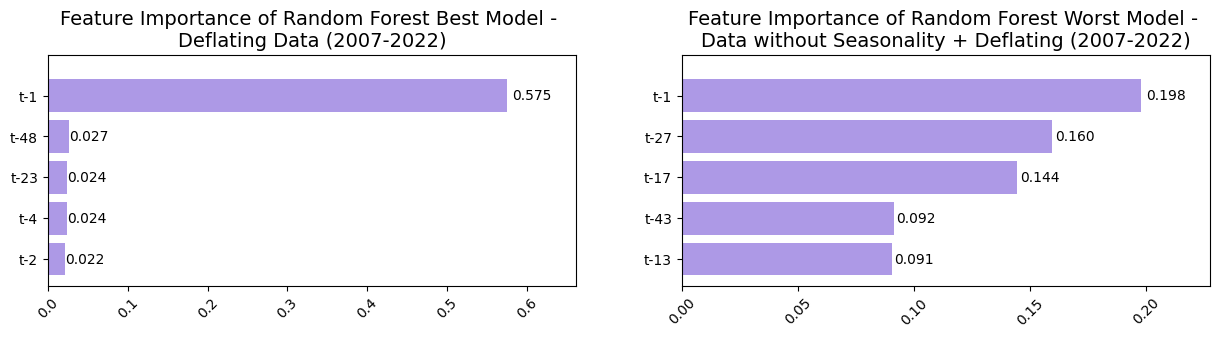

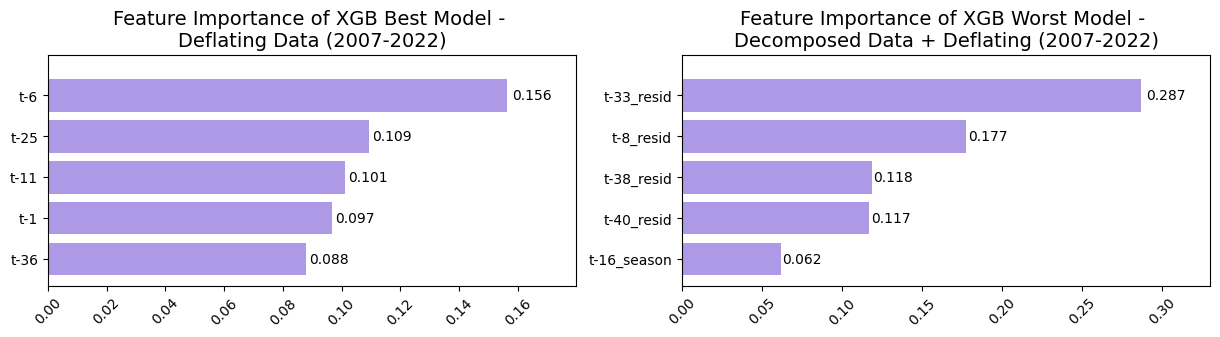

In [76]:
imp_plot.plotBestWorstFeatureImportance('MAE', top_k)

#### **9.2.4 MAE%**

##### **最佳模型**

In [77]:
# Random Forest
bw.best_rf['MAE%']

modelName dataType scoreType min_month  min_score
6  Random Forest      def      MAE%   2009-10     0.0445

In [78]:
# XGB
bw.best_xgb['MAE%']

modelName dataType scoreType min_month  min_score
6       XGB      def      MAE%   2017-02     0.0526

##### **最差模型**

In [79]:
# Random Forest
bw.worst_rf['MAE%']

modelName    dataType scoreType max_month  max_score
22  Random Forest  season_def      MAE%   2013-02     0.9371

In [80]:
# XGB
bw.worst_xgb['MAE%']

modelName dataType scoreType max_month  max_score
14       XGB  dec_def      MAE%   2013-01      0.776

##### **Feature Importance**



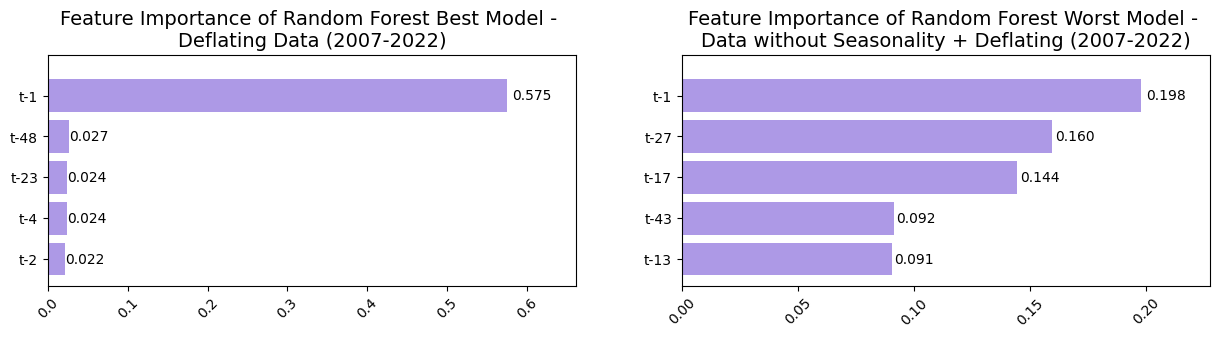

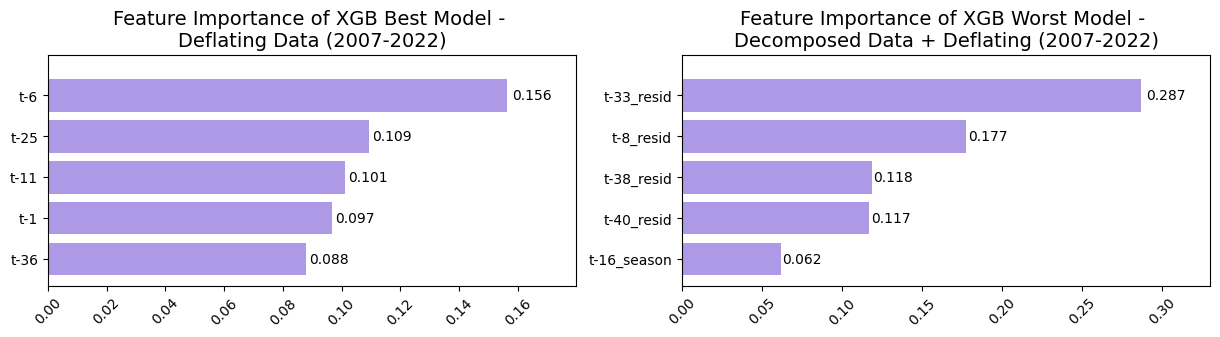

In [81]:
imp_plot.plotBestWorstFeatureImportance('MAE%', top_k)

### **9.3 所有模型組合中，預測最好和最差的模型組合**

||modelType|dataType|scoreType|Best & Worst Month|Total|
|-|-|-|-|-|-|
|Numbers|1|1|4|2 (fixed)|1x1x4x2 = 8|


#### **9.3.1 RMSE**

##### **最佳模型**

In [82]:
bw.best_all['RMSE']

modelName dataType scoreType min_month  min_score
4  Random Forest      def      RMSE   2009-10    80414.0

##### **最差模型**

In [83]:
bw.worst_all['RMSE']

modelName dataType scoreType max_month  max_score
12       XGB  dec_def      RMSE   2013-01  7095736.0

##### **Feature Importance**



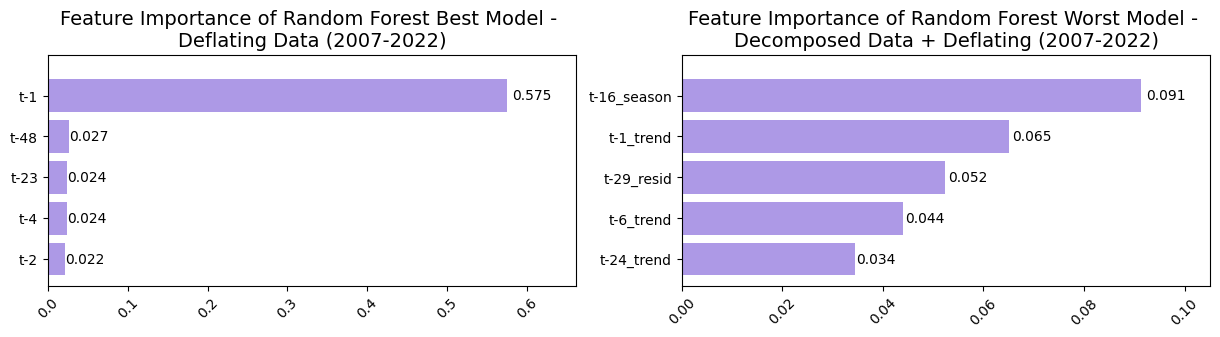

In [84]:
imp_plot.plotBestWorstFeatureImportance('RMSE', top_k, all = True)

#### **9.3.2 MAPE**

##### **最佳模型**

In [85]:
bw.best_all['MAPE']

modelName dataType scoreType min_month  min_score
7  Random Forest      def      MAPE   2014-10     0.1322

##### **最差模型**

In [86]:
bw.worst_all['MAPE']

modelName dataType scoreType max_month  max_score
11  Random Forest      dec      MAPE   2021-06     3.1971

##### **Feature Importance**



In [87]:
imp_plot.plotBestWorstFeatureImportance('MAPE', top_k, all = True)

#### **9.3.3 MAE**

##### **最佳模型**

In [88]:
bw.best_all['MAE']

modelName dataType scoreType min_month  min_score
5  Random Forest      def       MAE   2009-10    53334.0

##### **最差模型**

In [89]:
bw.worst_all['MAE']

modelName    dataType scoreType max_month  max_score
21  Random Forest  season_def       MAE   2013-02  1248841.0

##### **Feature Importance**



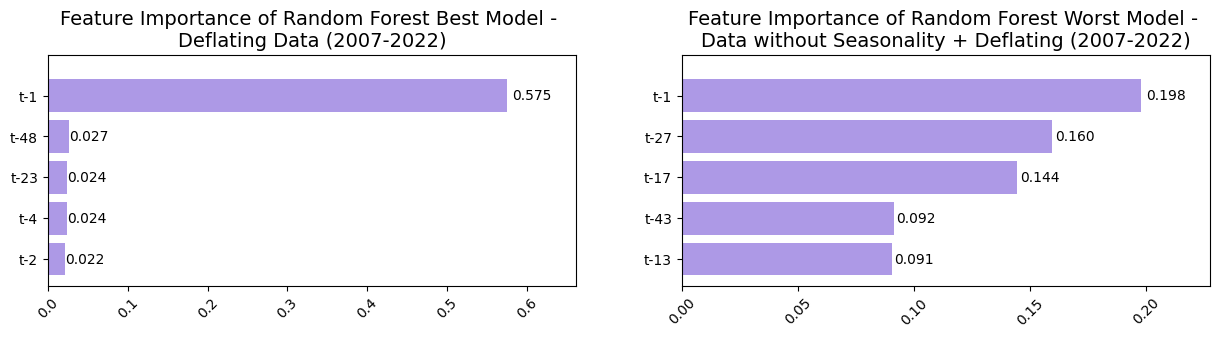

In [90]:
imp_plot.plotBestWorstFeatureImportance('MAE', top_k, all = True)

#### **9.3.4 MAE%**

##### **最佳模型**

In [91]:
bw.best_all['MAE%']

modelName dataType scoreType min_month  min_score
6  Random Forest      def      MAE%   2009-10     0.0445

##### **最差模型**

In [92]:
bw.worst_all['MAE%']

modelName    dataType scoreType max_month  max_score
22  Random Forest  season_def      MAE%   2013-02     0.9371

##### **Feature Importance**



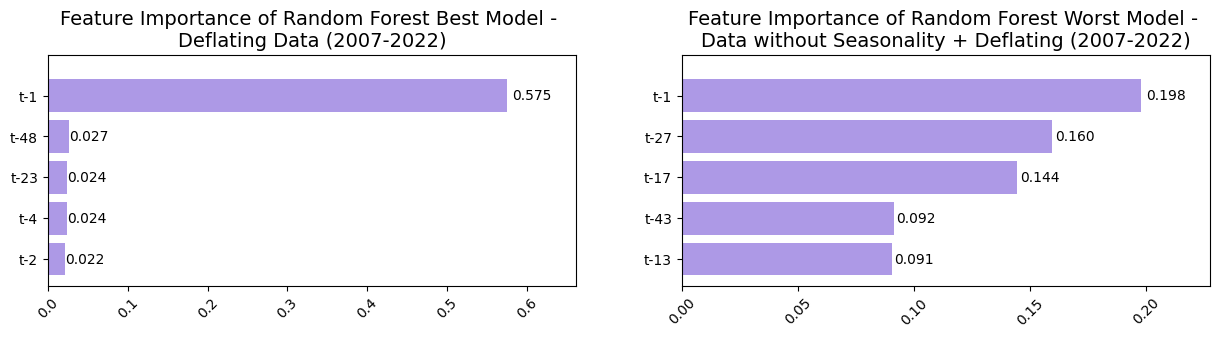

In [93]:
imp_plot.plotBestWorstFeatureImportance('MAE%', top_k, all = True)